In [7]:
import pandas as pd

# Load the dataset
file_path = 'Sports Data.xlsx'
data = pd.read_excel(file_path, sheet_name="Sports data for DSBA")


# Display the first few rows of the dataset
print(data.head())

# Get the shape of the dataset (rows, columns)
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Display summary statistics for numerical columns
print(data.describe())

# Display information about the dataset
print(data.info())


  Game_number Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1   Loss          18.0              Day          ODI   
1      Game_2    Win          24.0              Day          T20   
2      Game_3   Loss          24.0    Day and Night          T20   
3      Game_4    Win          24.0              NaN          ODI   
4      Game_5   Loss          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

  First_selection  Opponent  ... Max_run_scored_1over  Max_wicket_taken_1over  \
0         Bowling  Srilanka  ...                 13.0                       3   
1         Batting  Zimbabwe  ...

In [8]:
# Define new column names based on the provided descriptions
column_mapping = {
    'Game_number': 'game_number',
    'Result': 'result',
    'Avg_team_Age': 'avg_team_age',
    'Match_light_type': 'match_light_type',
    'Match_format': 'match_format',
    'Bowlers_in_team': 'bowlers_in_team',
    'Wicket_keeper_in_team': 'wicket_keeper_in_team',
    'All_rounder_in_team': 'all_rounder_in_team',
    'First_selection': 'first_selection',
    'Opponent': 'opponent',
    'Season': 'season',
    'Audience_number': 'audience_number',
    'Offshore': 'offshore',
    'Max_run_scored_1over': 'max_run_scored_1over',
    'Max_wicket_taken_1over': 'max_wicket_taken_1over',
    'Extra_bowls_bowled': 'extra_bowls_bowled',
    'Min_run_given_1over': 'min_run_given_1over',
    'Min_run_scored_1over': 'min_run_scored_1over',
    'Max_run_given_1over': 'max_run_given_1over',
    'extra_bowls_opponent': 'extra_bowls_opponent',
    'player_highest_run': 'player_highest_run',
    'Players_scored_zero': 'players_scored_zero',
    'player_highest_wicket': 'player_highest_wicket'
}

# Rename columns
data.rename(columns=column_mapping, inplace=True)

# Display the first few rows of the renamed dataframe
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_number             2930 non-null   object 
 1   result                  2930 non-null   object 
 2   avg_team_age            2833 non-null   float64
 3   match_light_type        2878 non-null   object 
 4   match_format            2860 non-null   object 
 5   bowlers_in_team         2848 non-null   float64
 6   wicket_keeper_in_team   2930 non-null   int64  
 7   all_rounder_in_team     2890 non-null   float64
 8   first_selection         2871 non-null   object 
 9   opponent                2894 non-null   object 
 10  season                  2868 non-null   object 
 11  audience_number         2849 non-null   float64
 12  offshore                2866 non-null   object 
 13  max_run_scored_1over    2902 non-null   float64
 14  max_wicket_taken_1over  2930 non-null   

In [9]:
# Define the continuous and categorical variables based on the context
continuous_vars = ['avg_team_age', 'audience_number', 'max_run_scored_1over',
                   'max_wicket_taken_1over', 'extra_bowls_bowled', 'min_run_given_1over',
                   'min_run_scored_1over', 'max_run_given_1over', 'extra_bowls_opponent',
                   'player_highest_run', 'players_scored_zero', 'player_highest_wicket', 'bowlers_in_team', 'all_rounder_in_team']

categorical_vars = ['match_light_type', 'match_format', 'first_selection', 'opponent', 'season', 'offshore']

# Ensure continuous variables are numeric
for var in continuous_vars:
    data[var] = pd.to_numeric(data[var], errors='coerce')

# Fill missing values for continuous variables with the mean
for var in continuous_vars:
    data[var].fillna(data[var].mean(), inplace=True)

# Fill missing values for categorical variables with the mode
for var in categorical_vars:
    data[var].fillna(data[var].mode()[0], inplace=True)

# Display the cleaned dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_number             2930 non-null   object 
 1   result                  2930 non-null   object 
 2   avg_team_age            2930 non-null   float64
 3   match_light_type        2930 non-null   object 
 4   match_format            2930 non-null   object 
 5   bowlers_in_team         2930 non-null   float64
 6   wicket_keeper_in_team   2930 non-null   int64  
 7   all_rounder_in_team     2930 non-null   float64
 8   first_selection         2930 non-null   object 
 9   opponent                2930 non-null   object 
 10  season                  2930 non-null   object 
 11  audience_number         2930 non-null   float64
 12  offshore                2930 non-null   object 
 13  max_run_scored_1over    2930 non-null   float64
 14  max_wicket_taken_1over  2930 non-null   

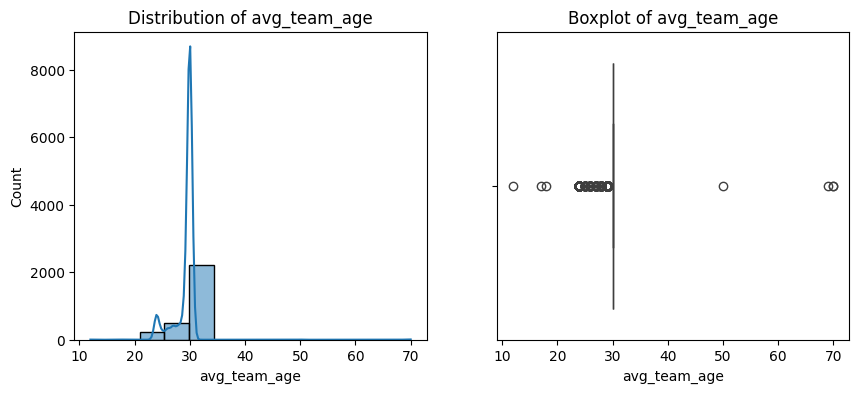

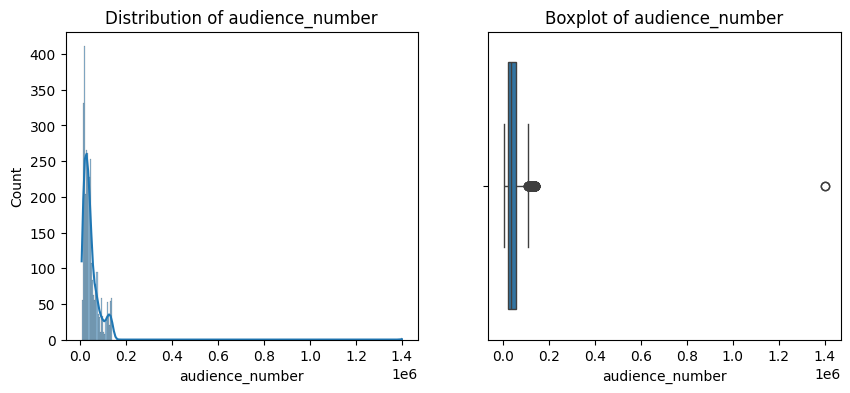

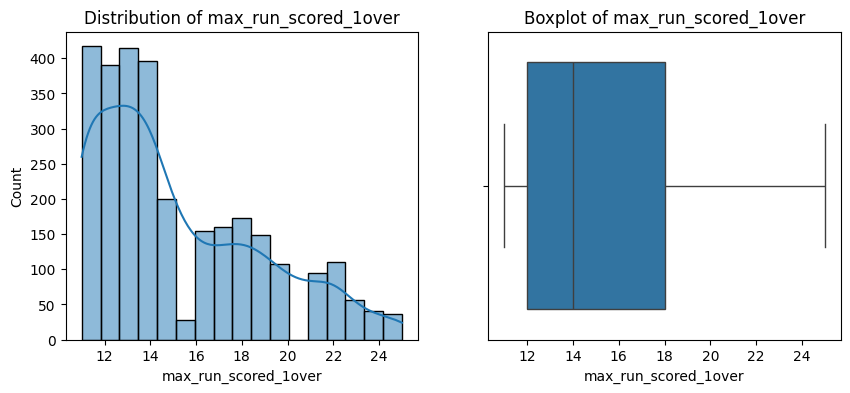

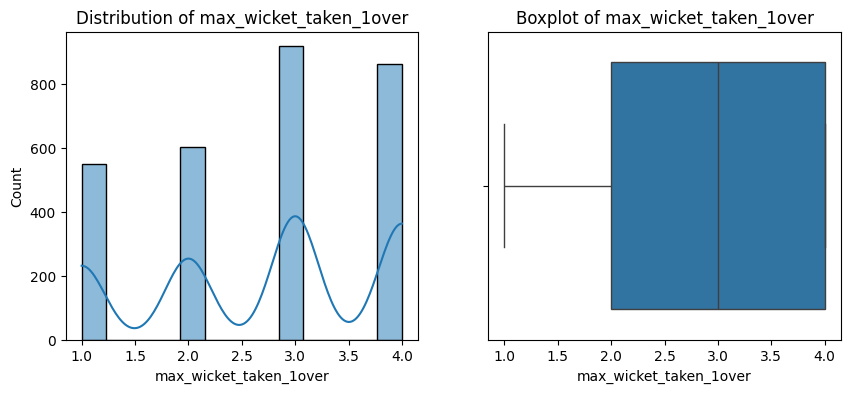

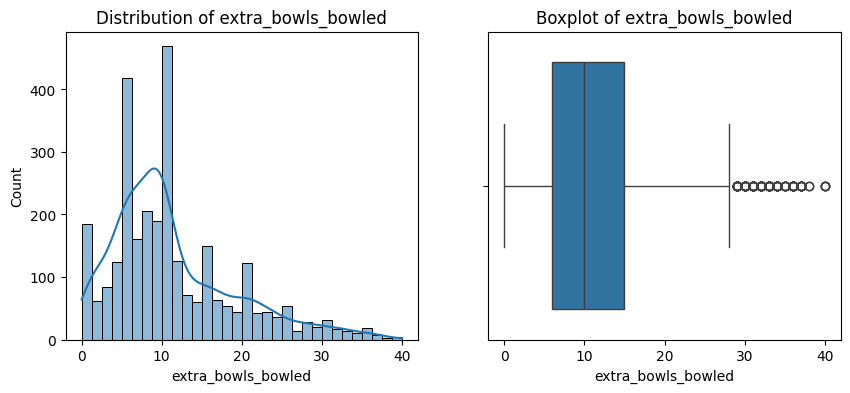

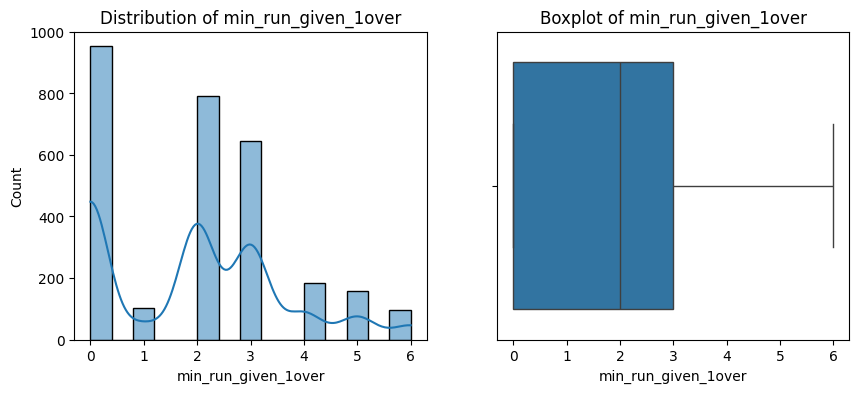

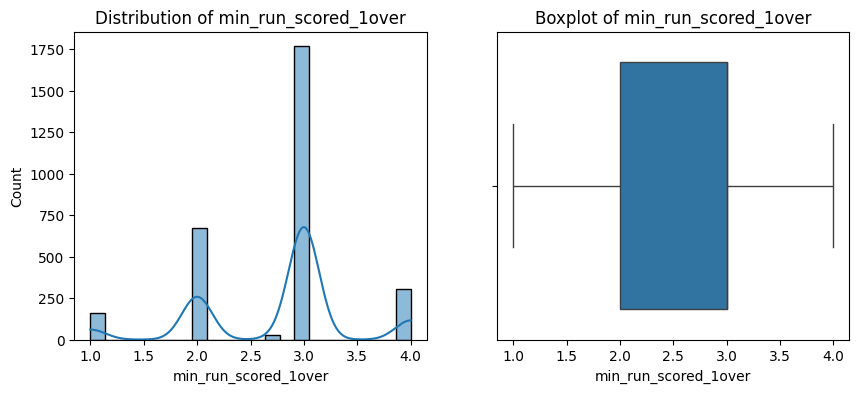

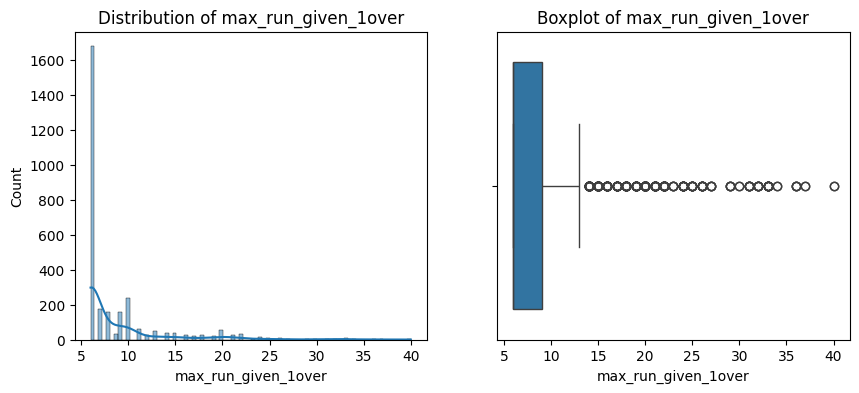

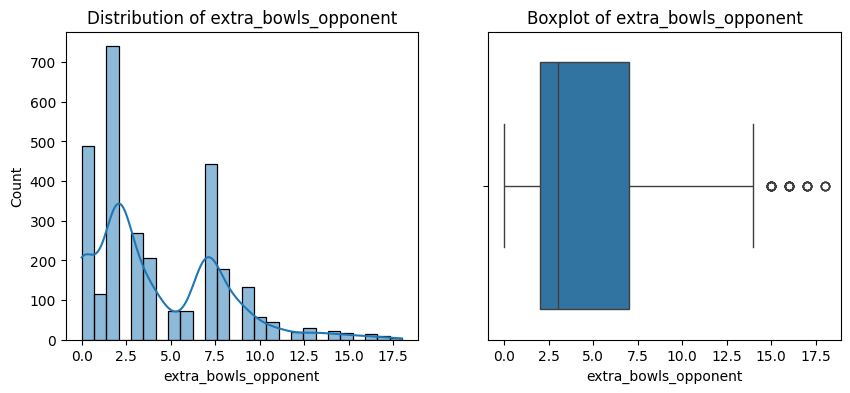

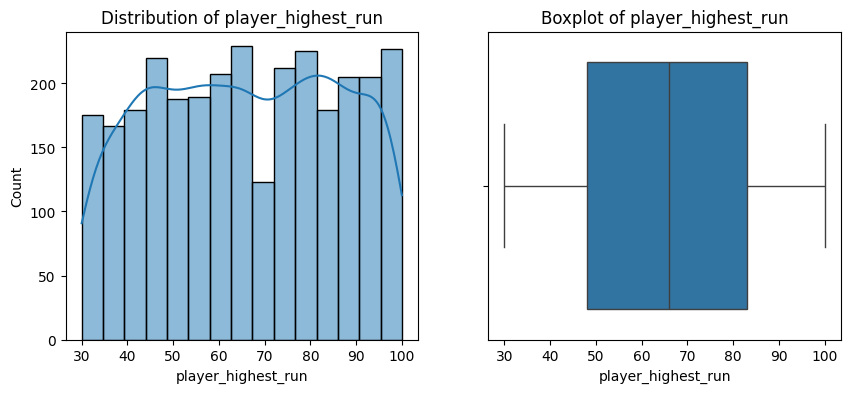

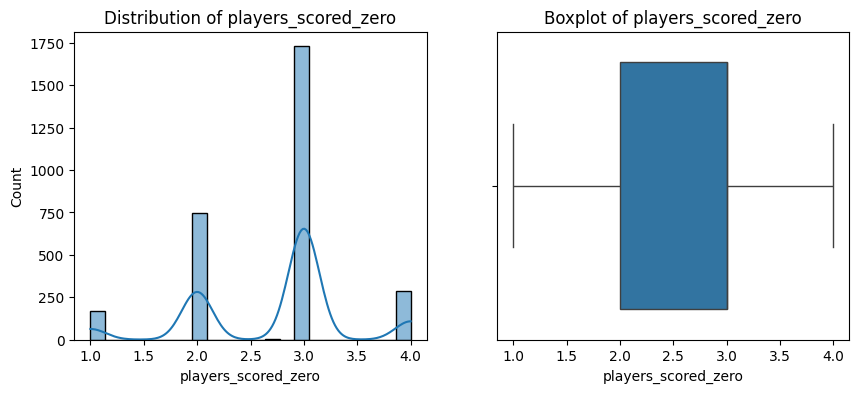

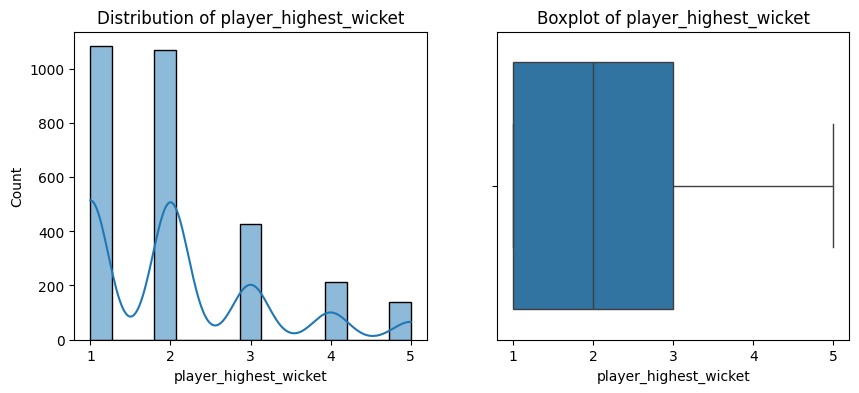

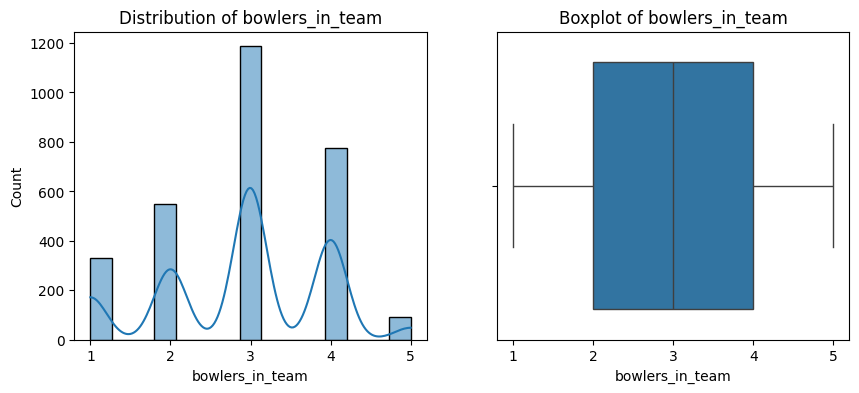

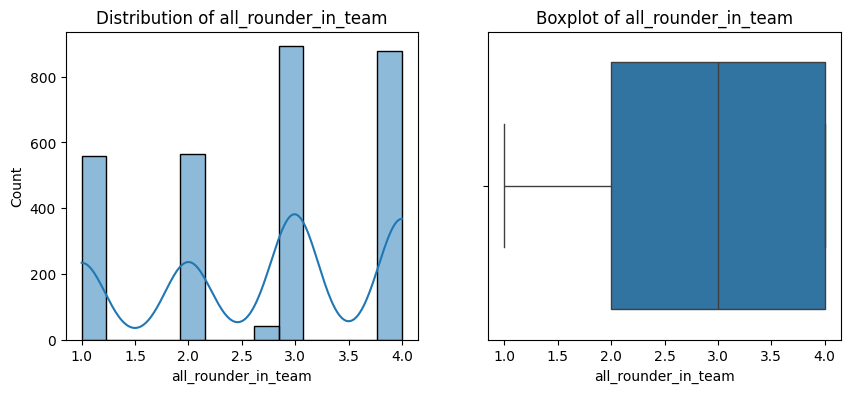

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var].dropna())
    plt.title(f'Boxplot of {var}')

    plt.show()

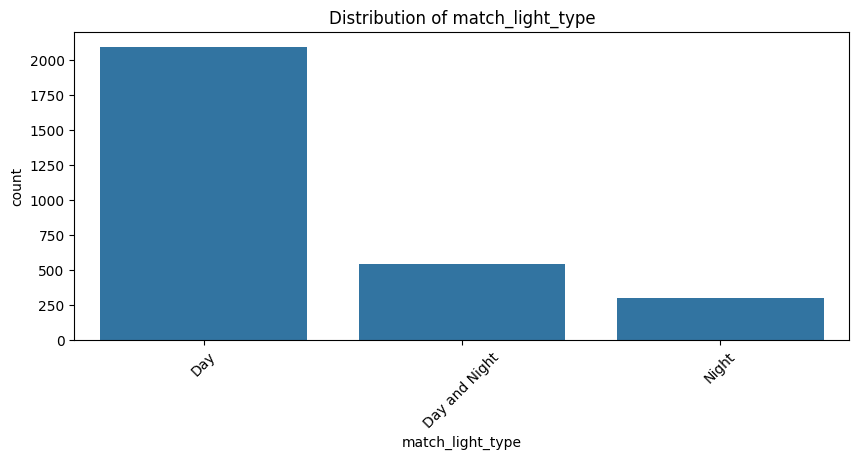

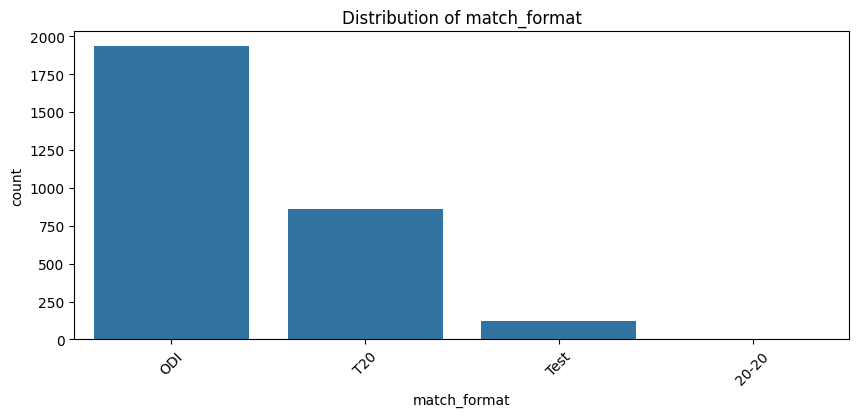

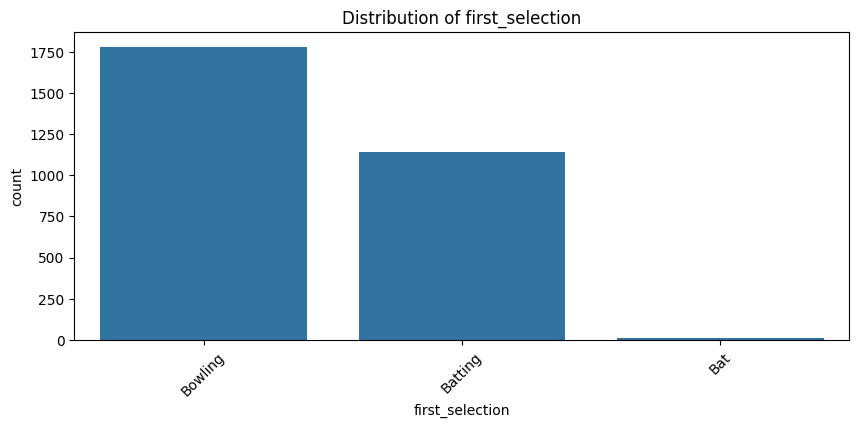

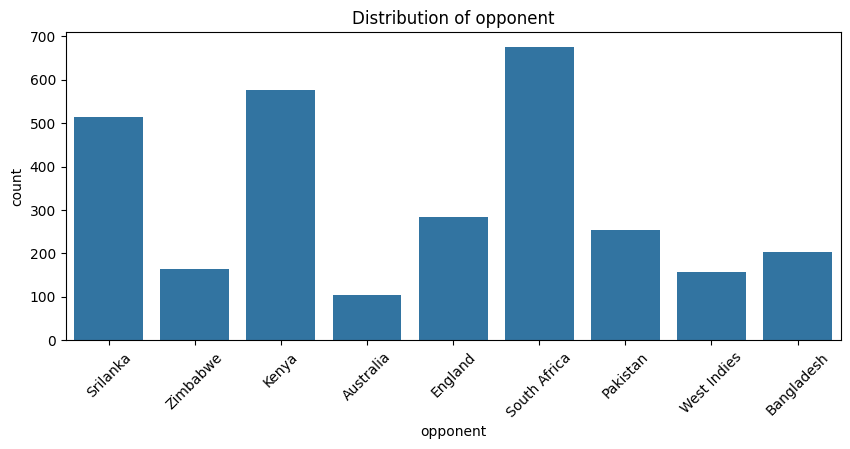

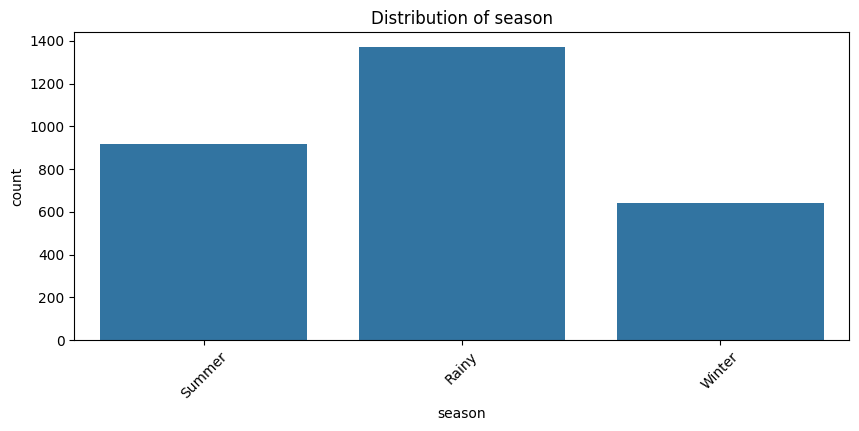

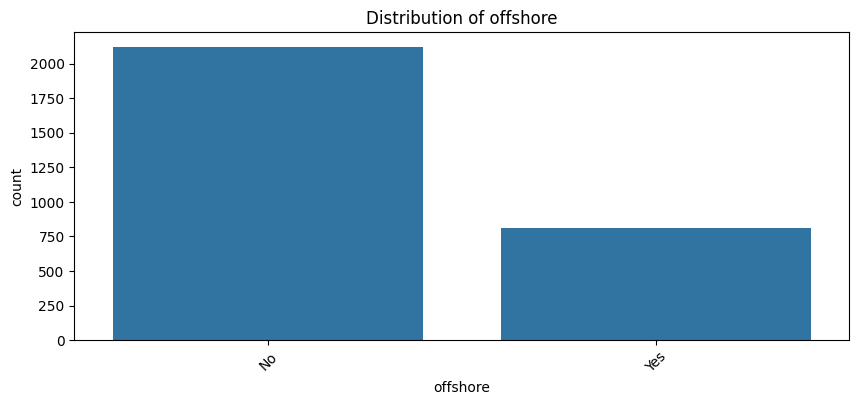

In [11]:
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[var])
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

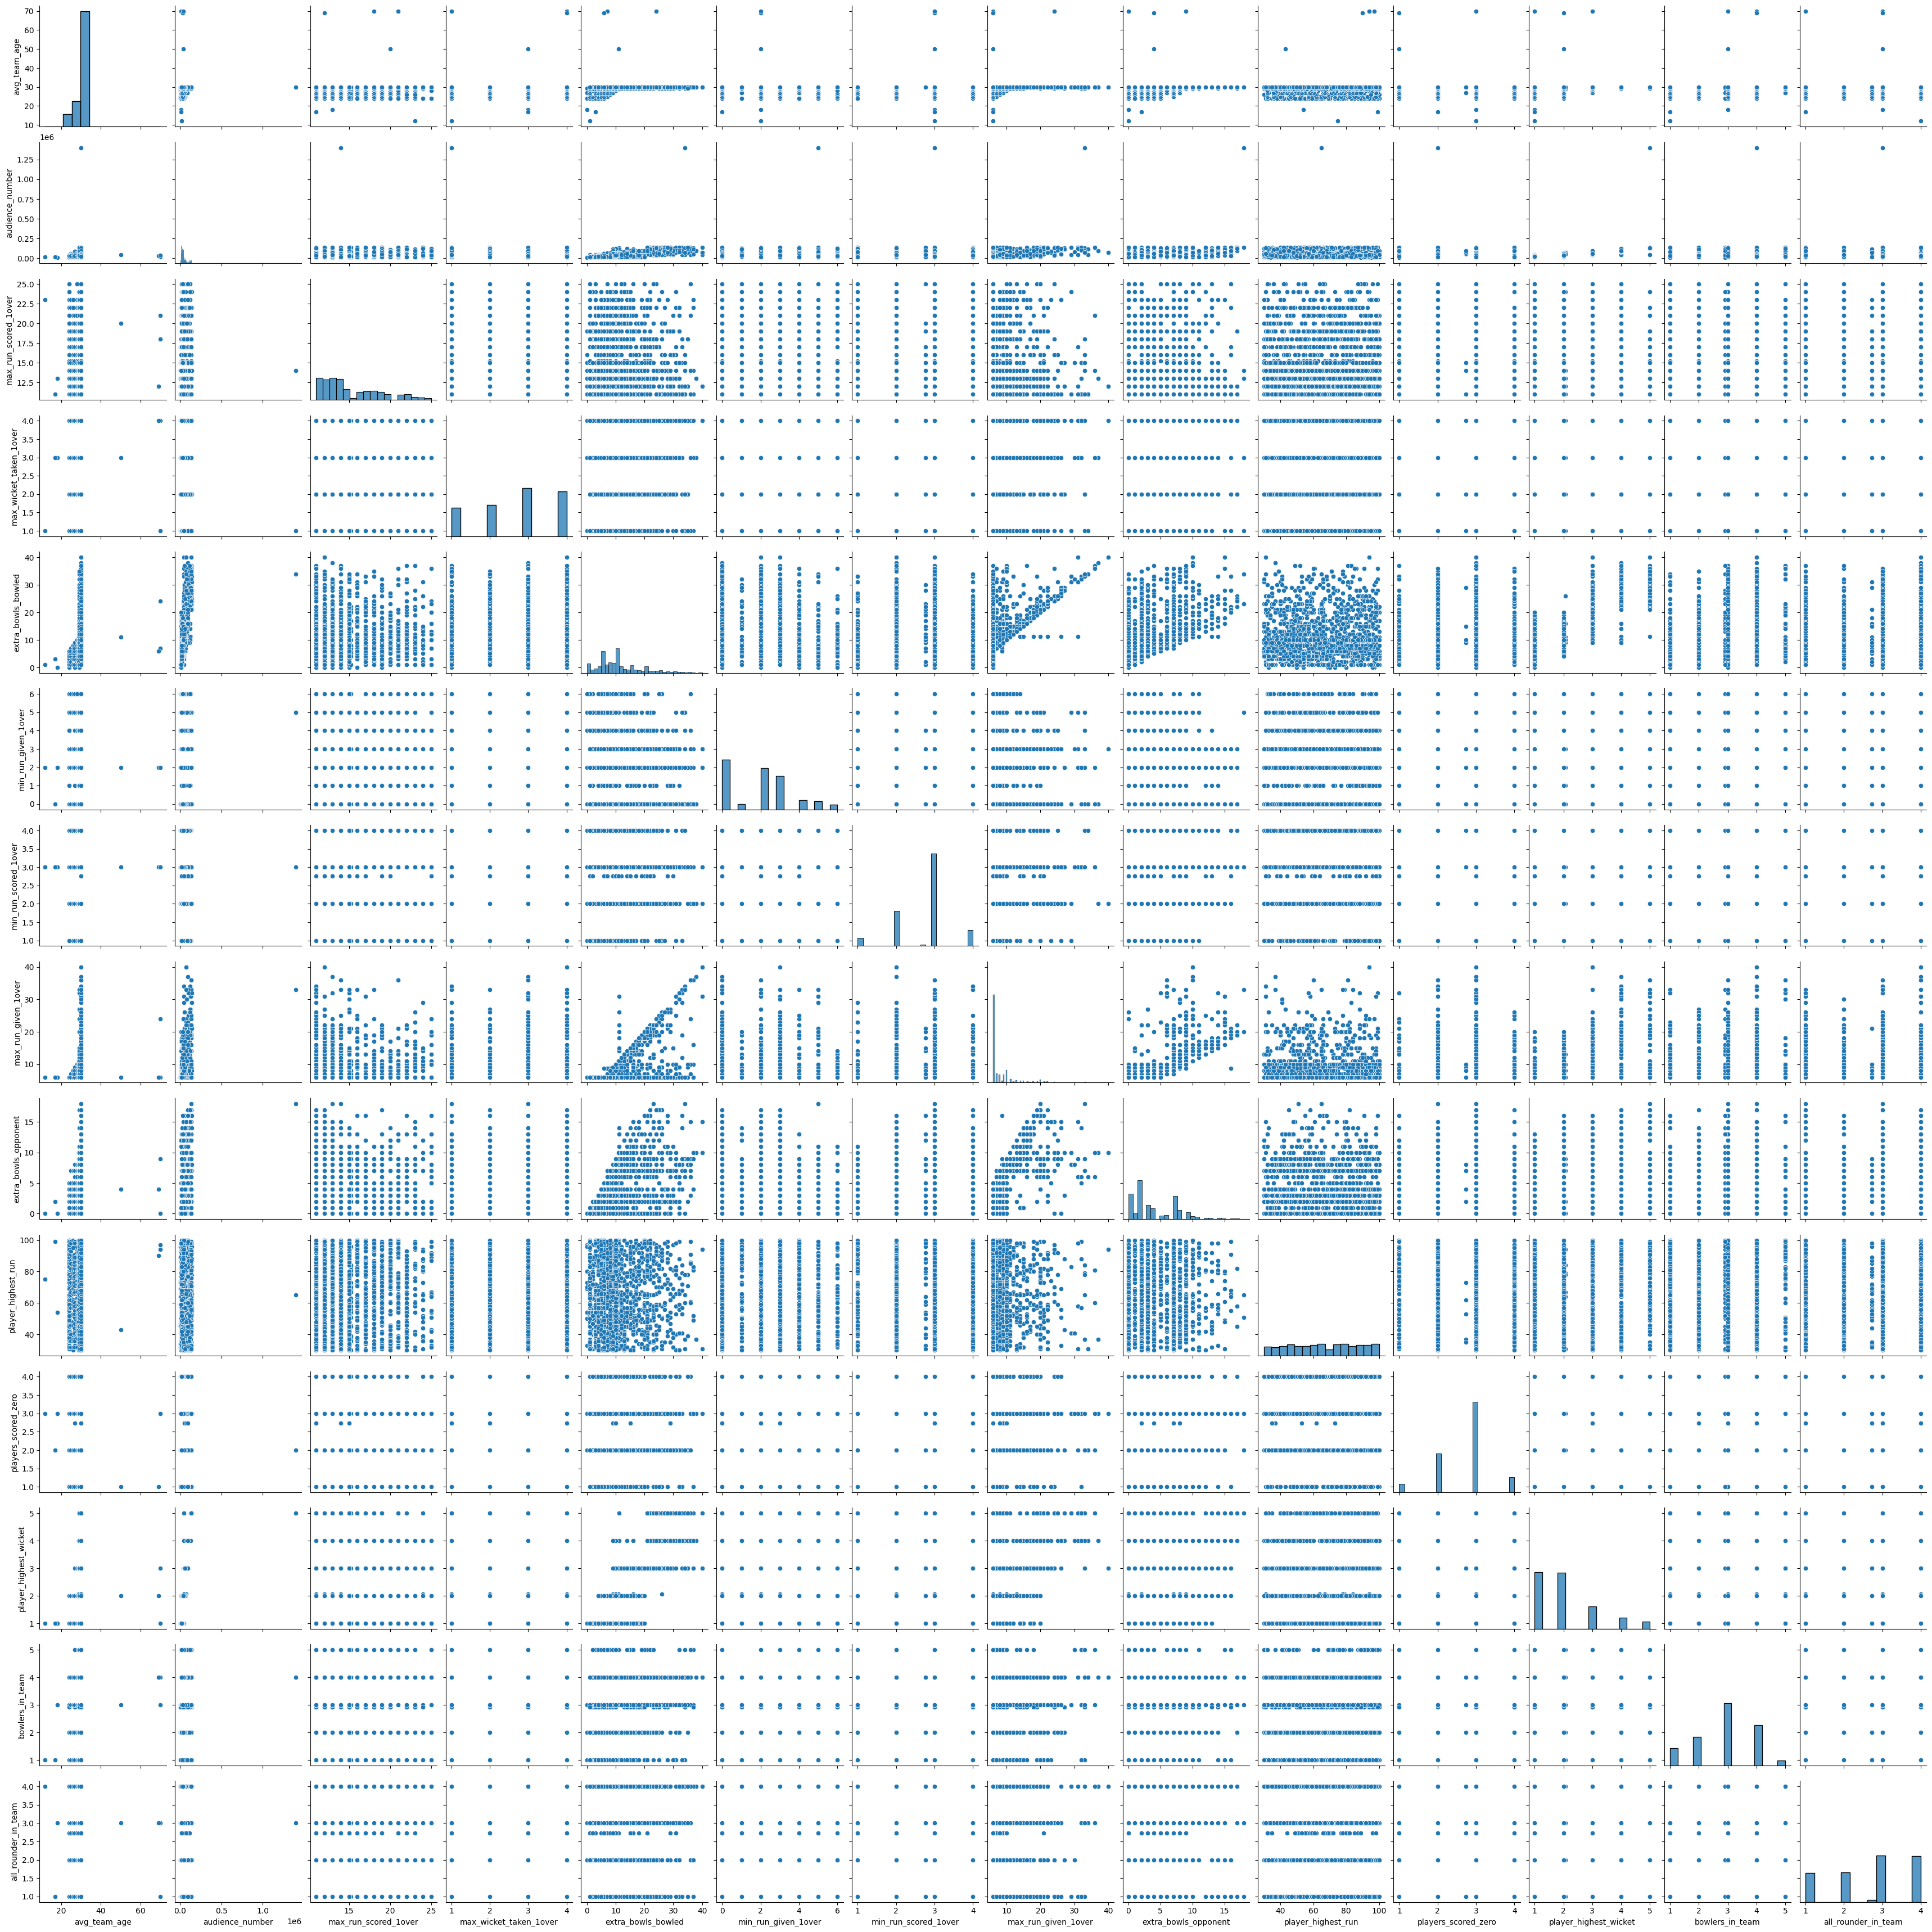

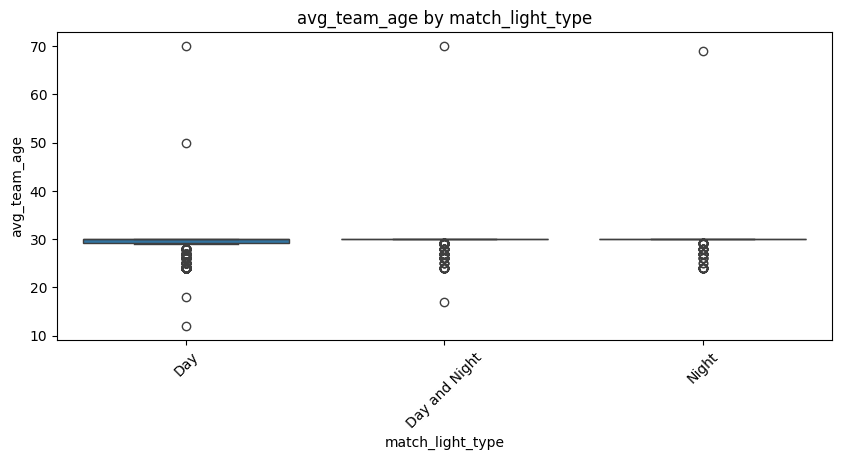

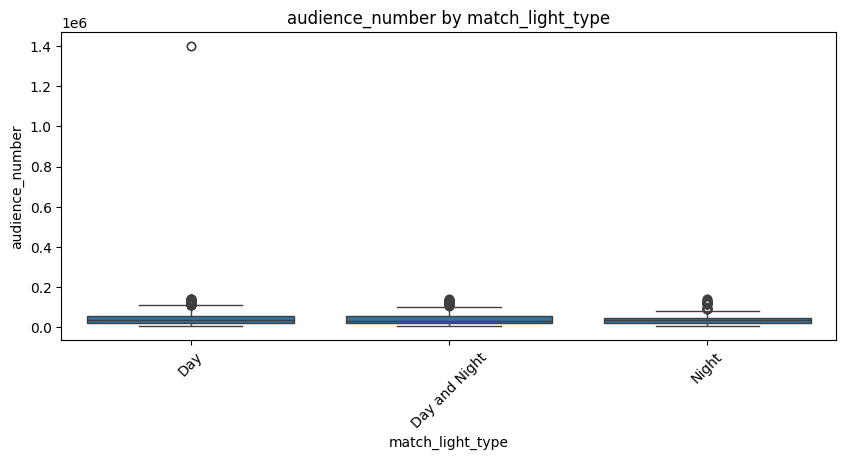

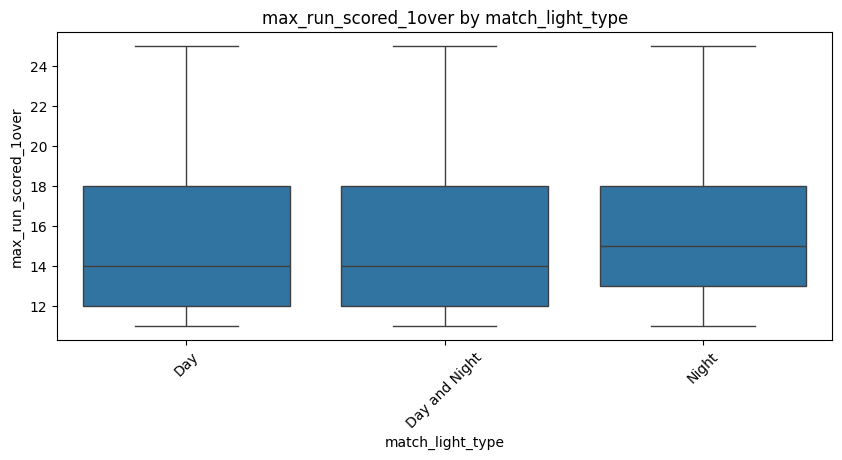

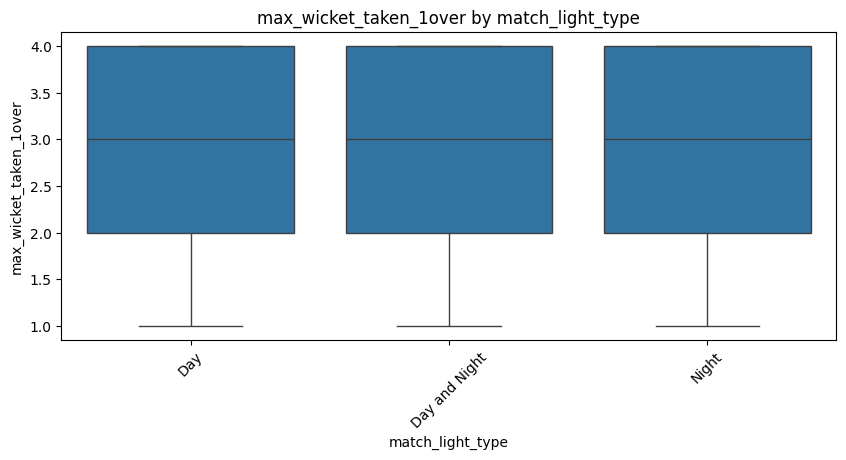

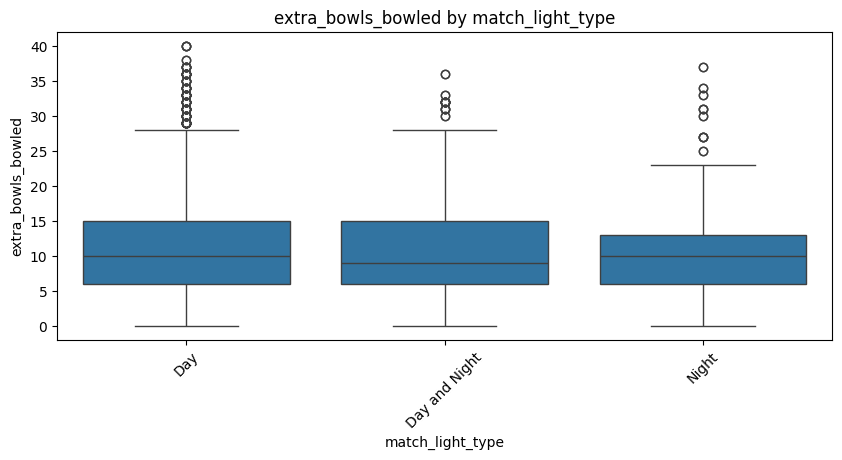

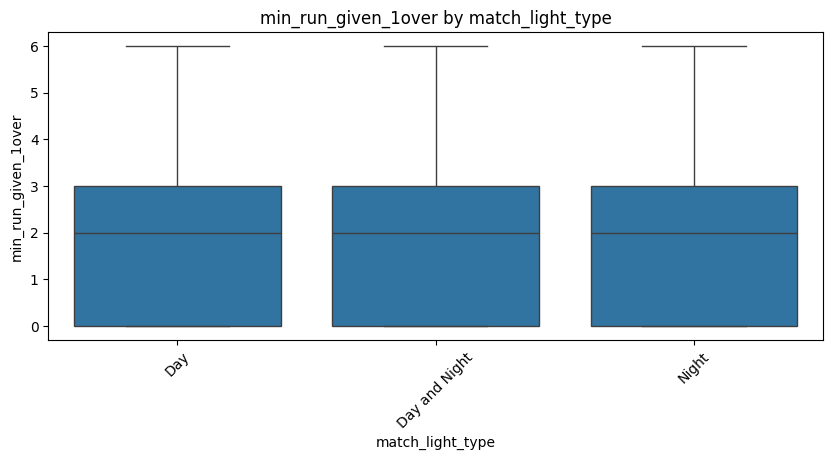

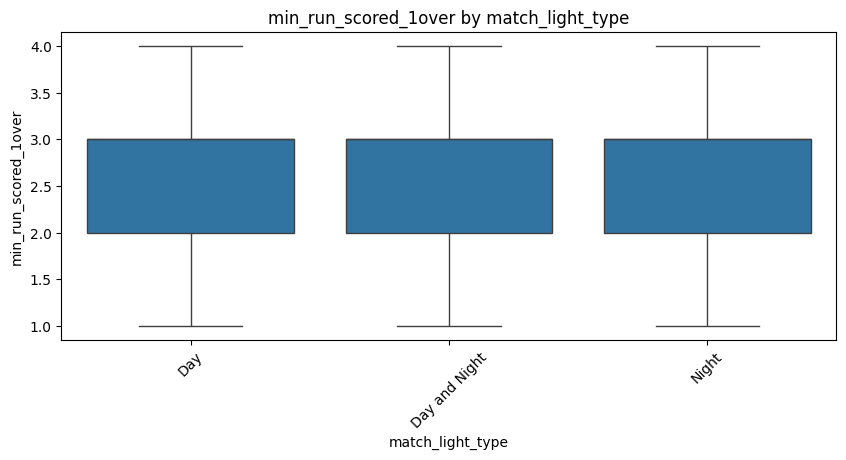

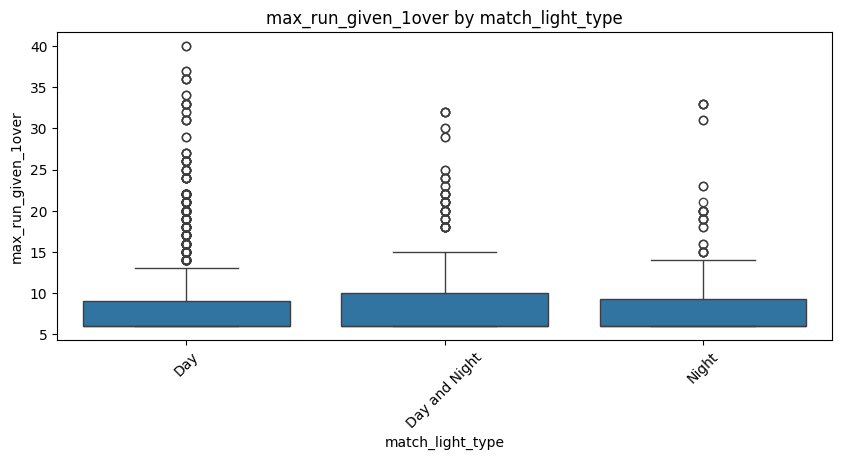

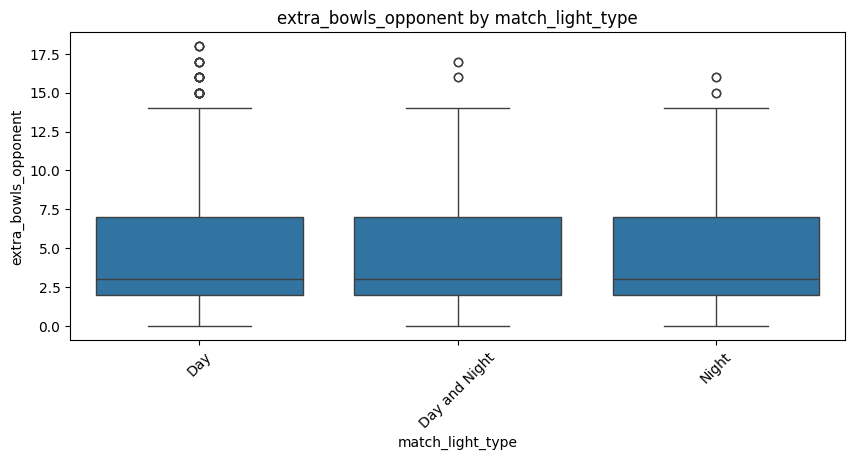

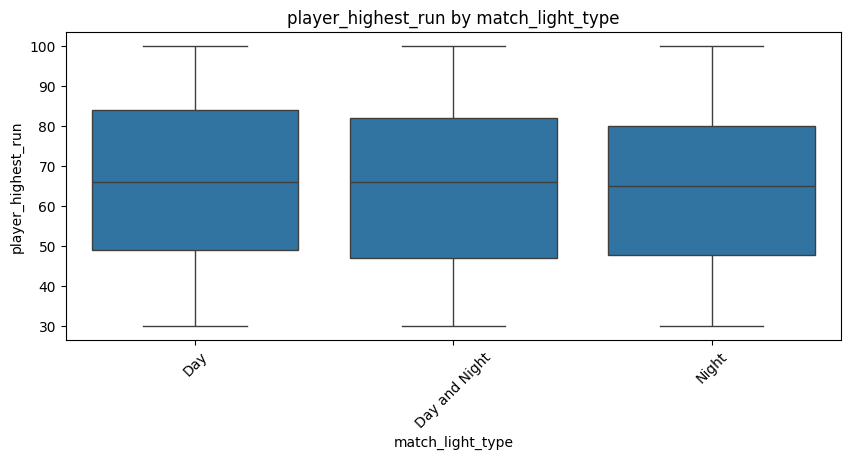

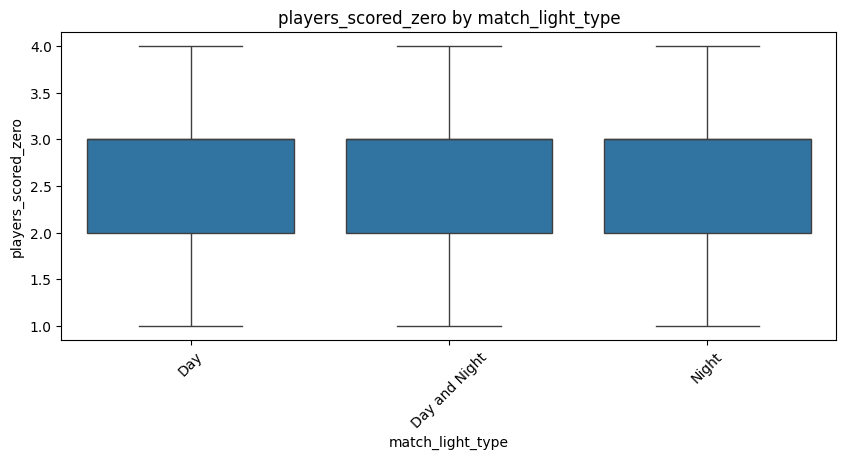

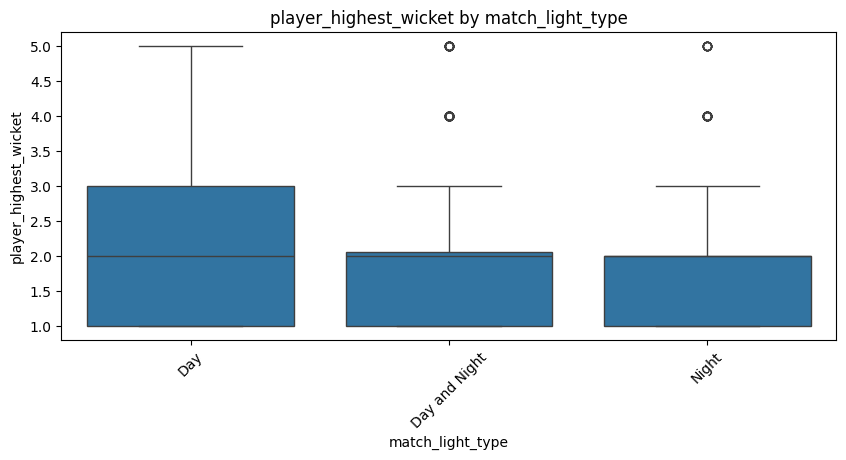

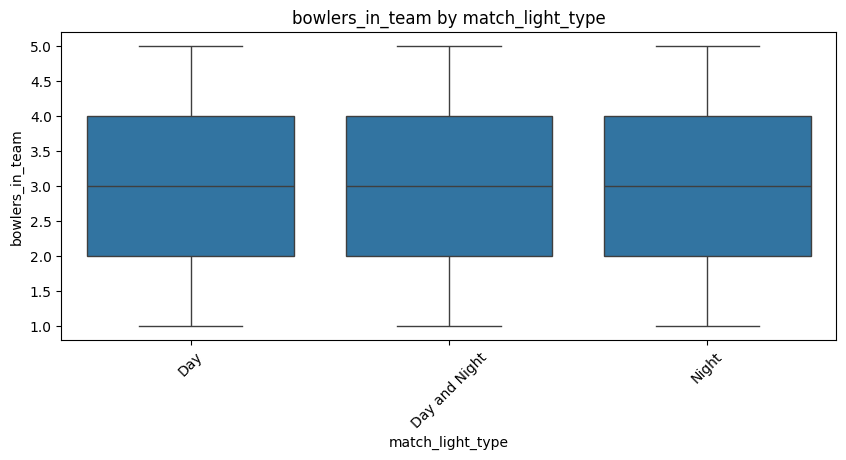

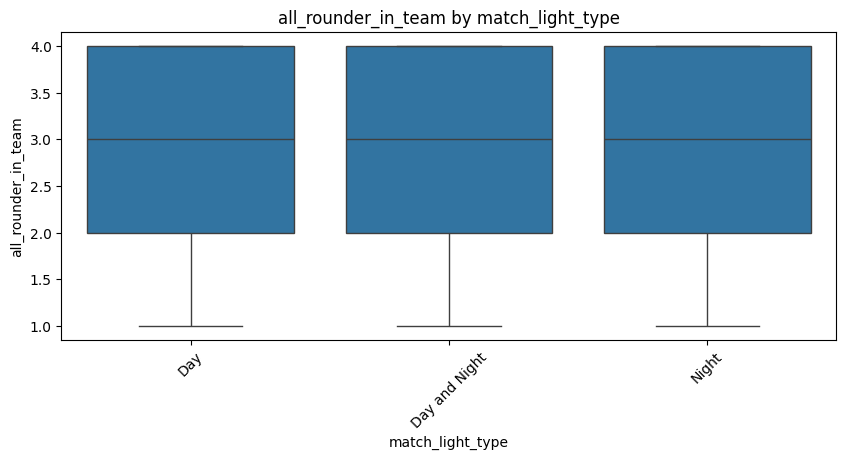

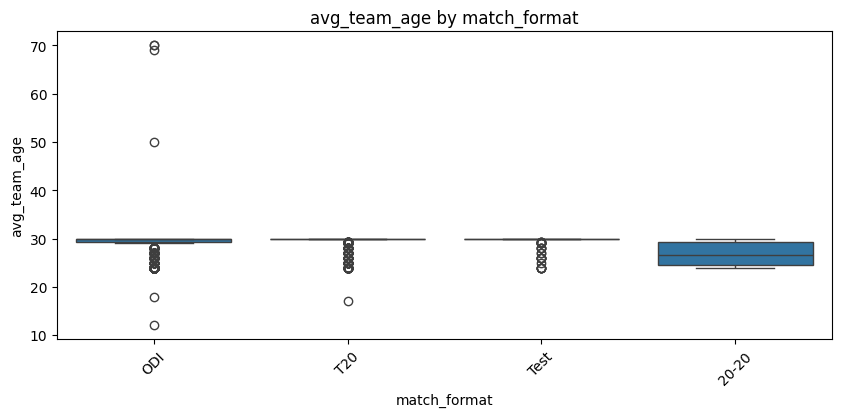

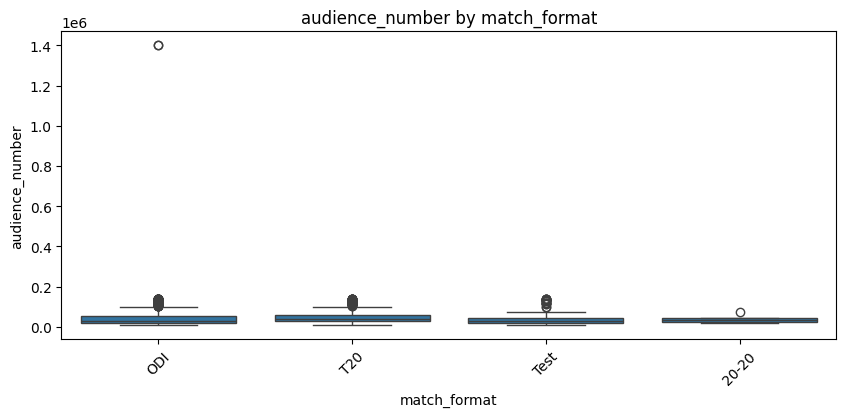

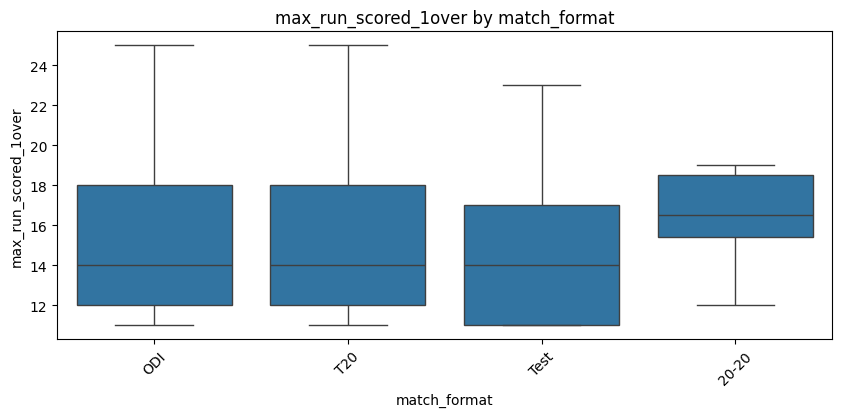

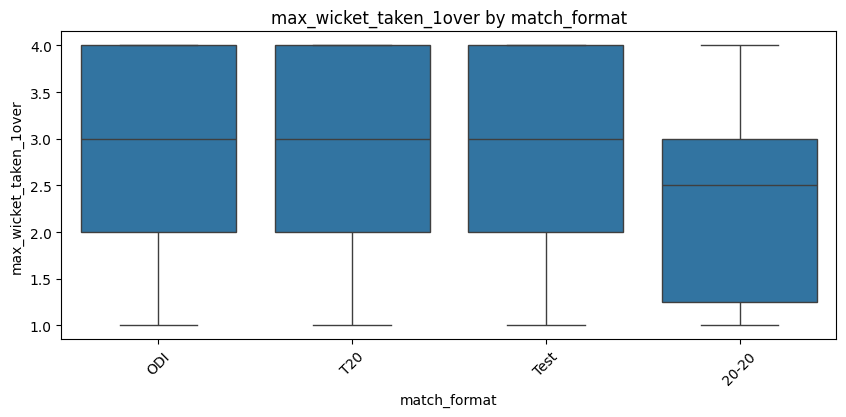

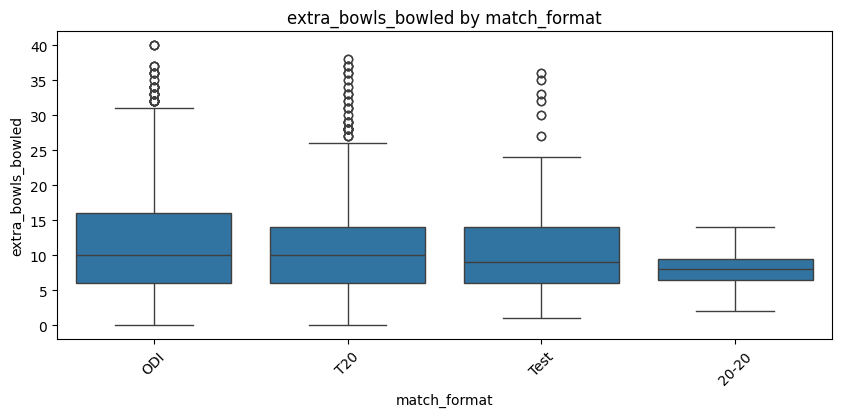

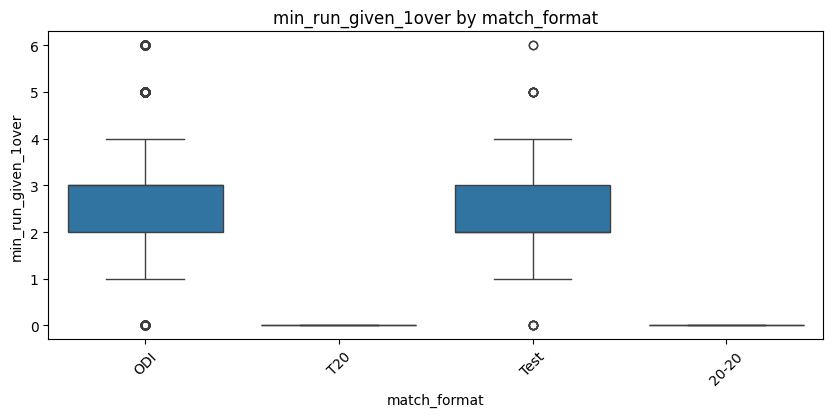

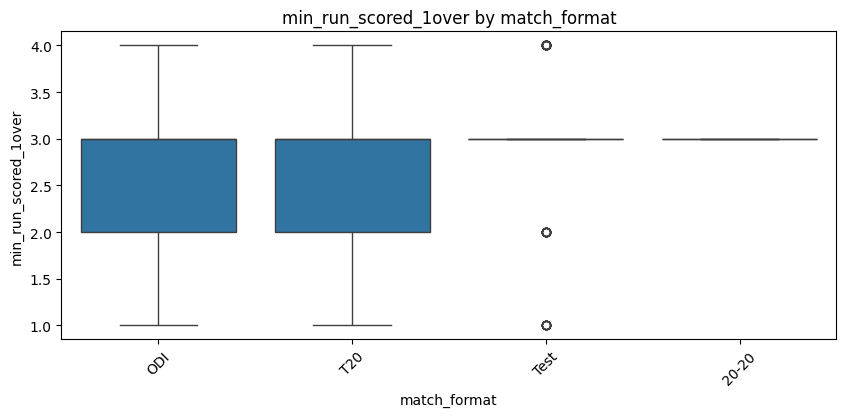

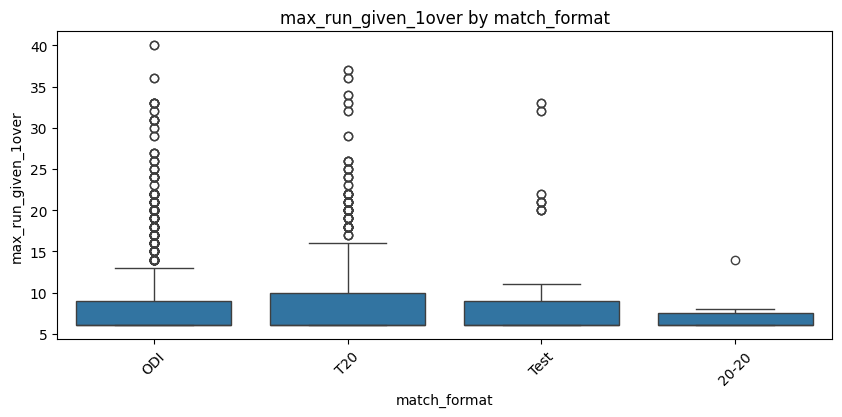

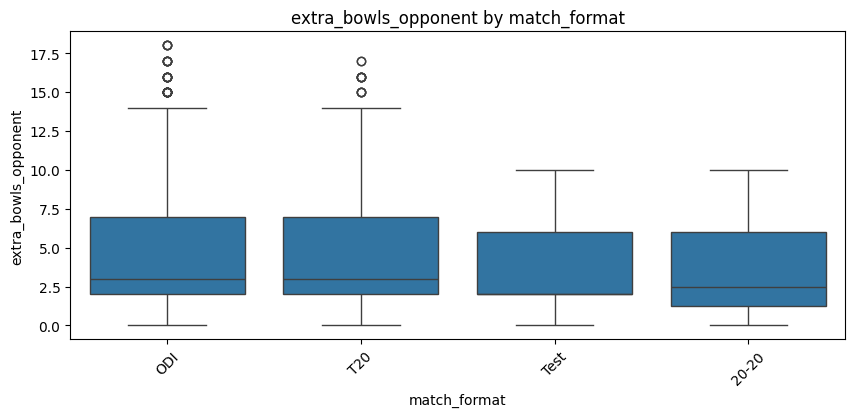

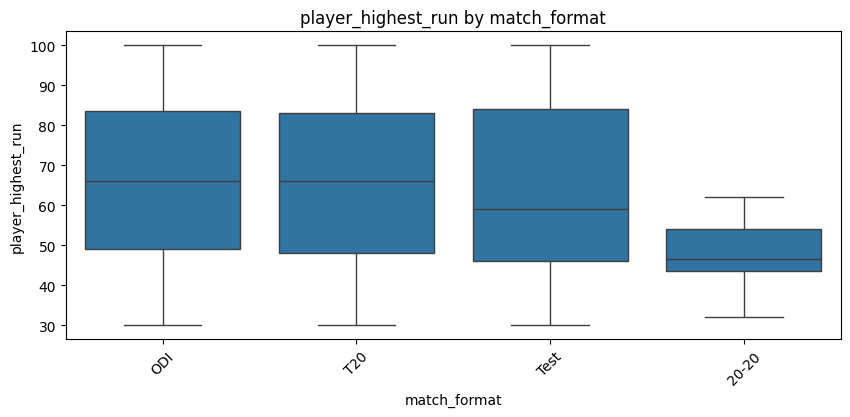

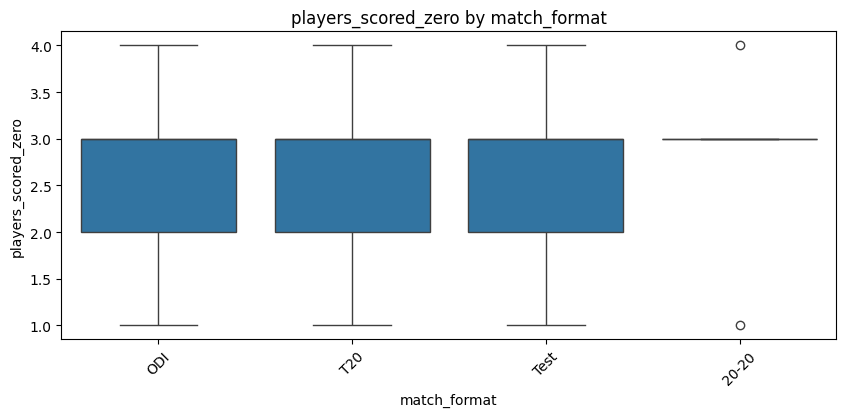

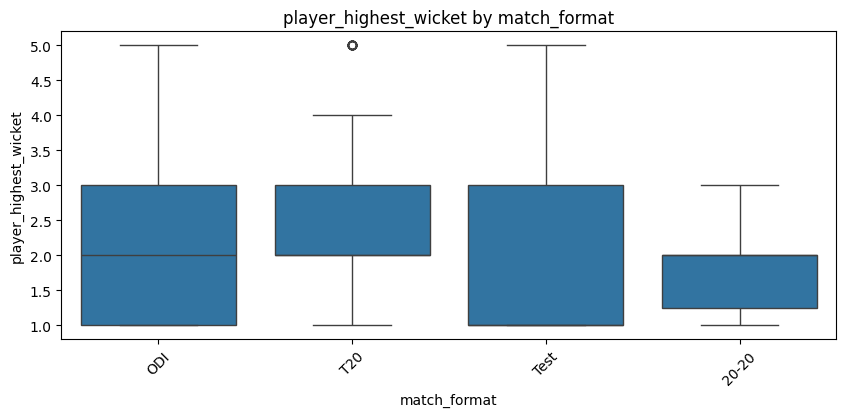

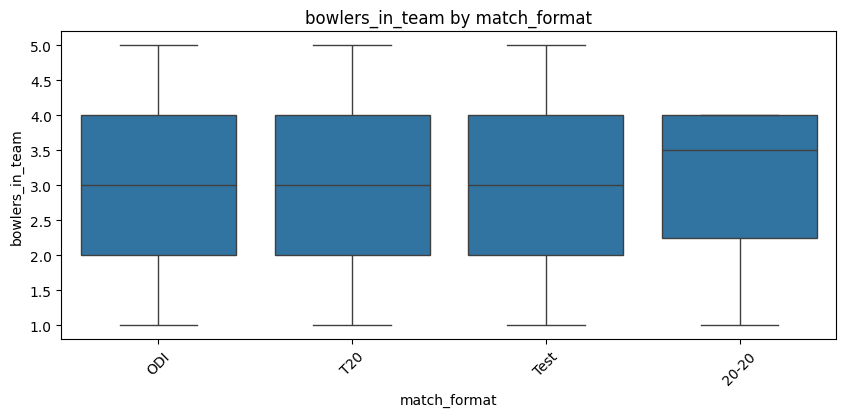

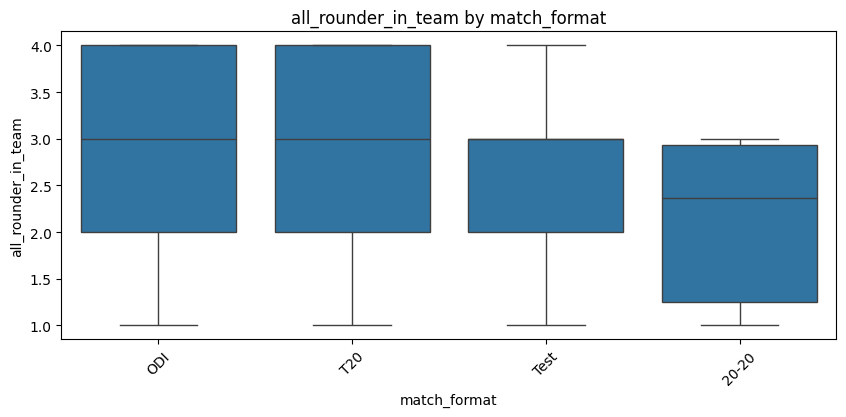

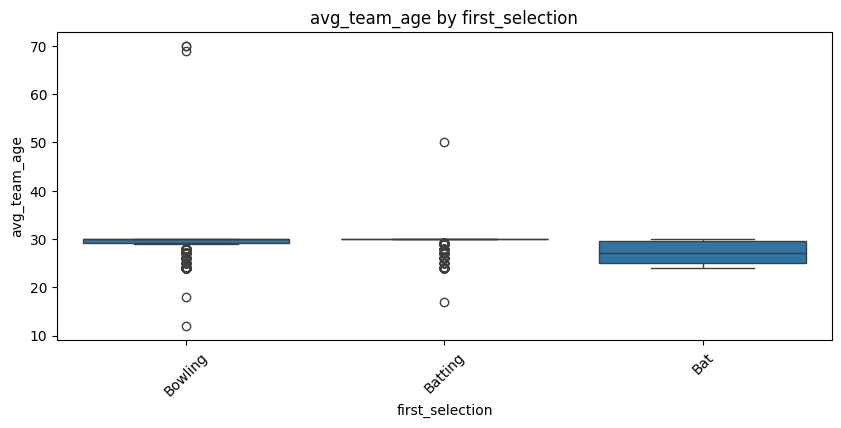

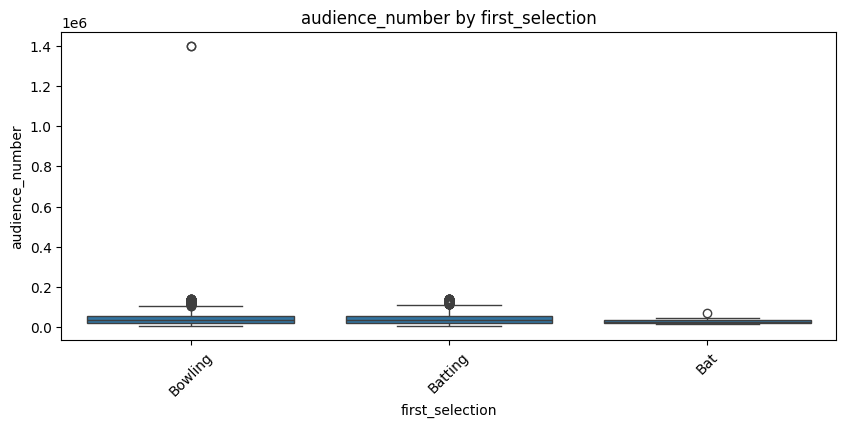

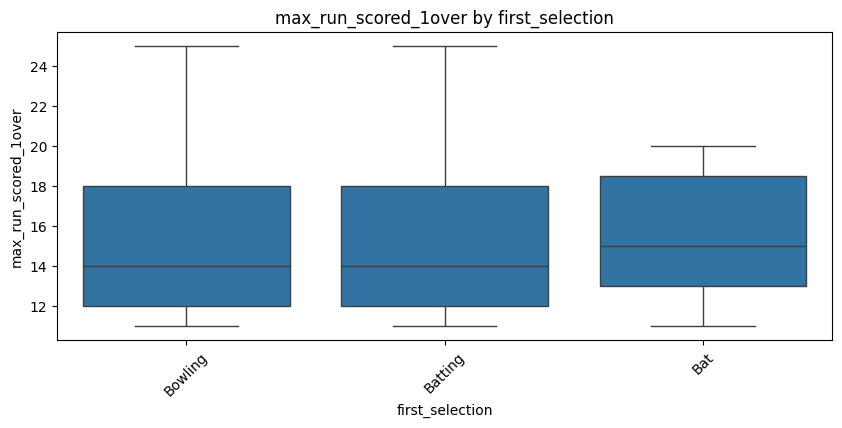

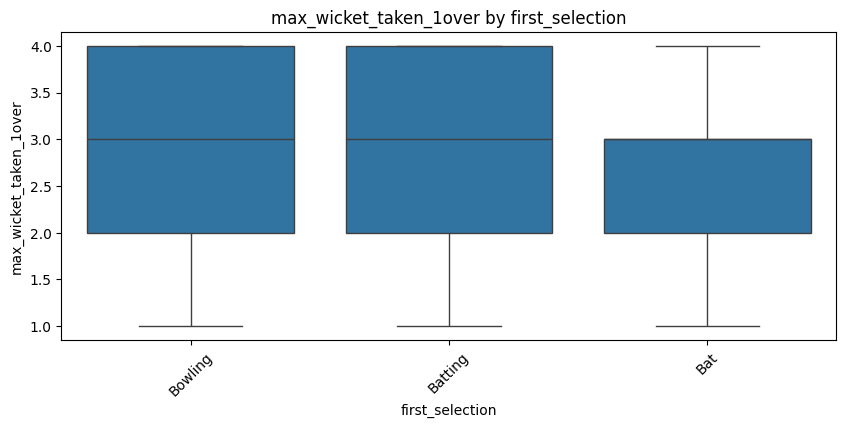

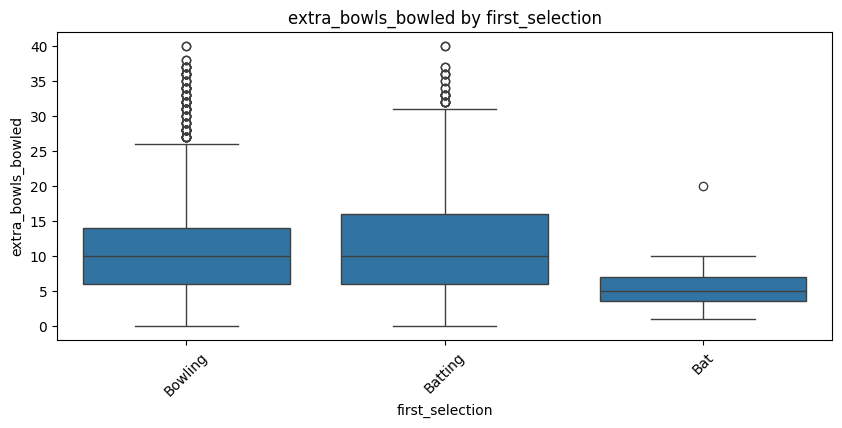

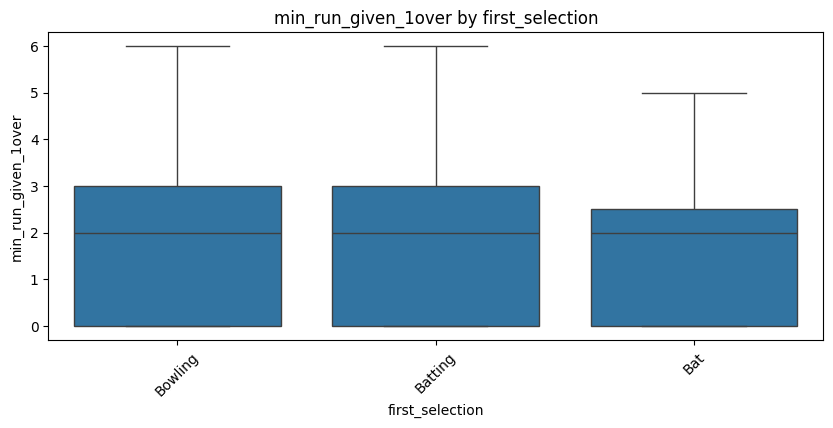

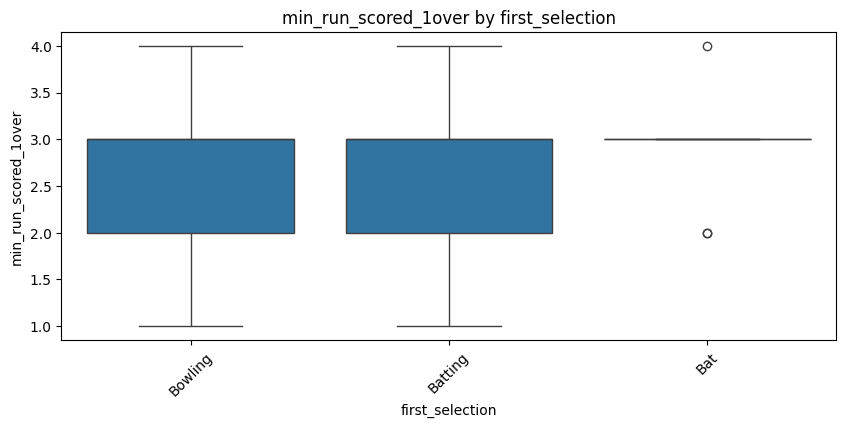

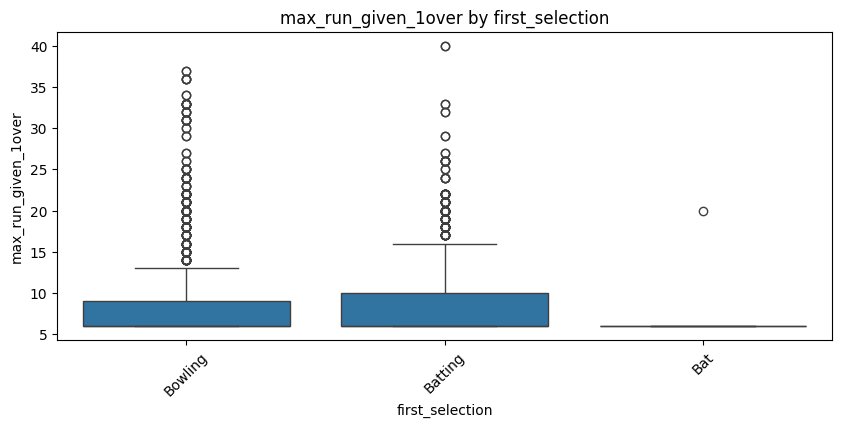

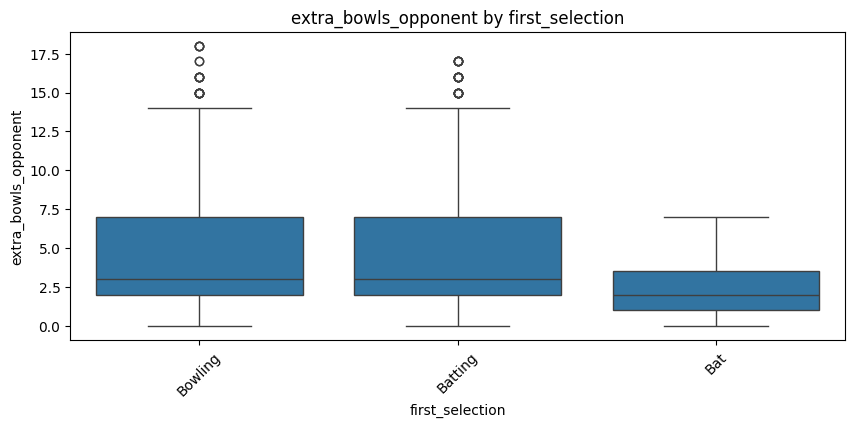

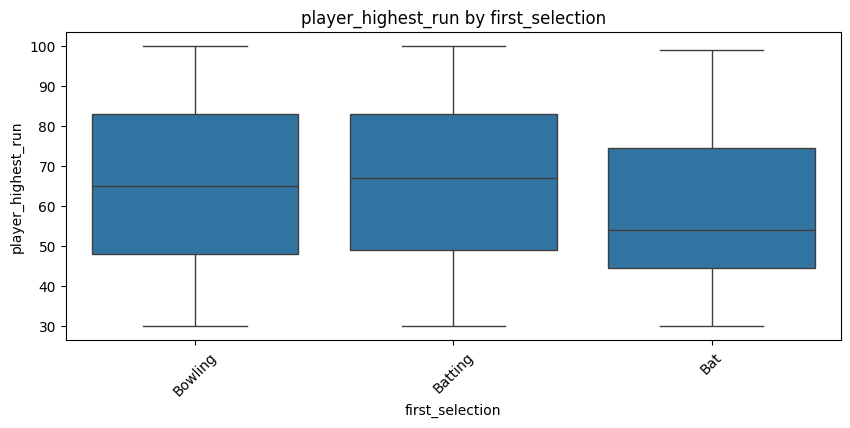

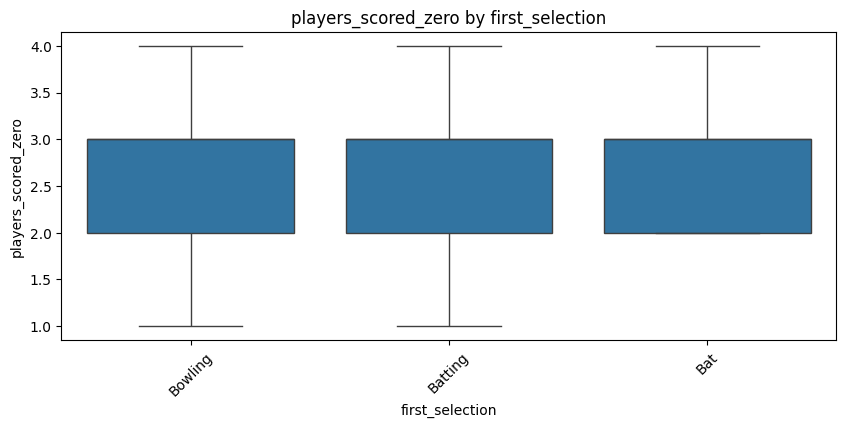

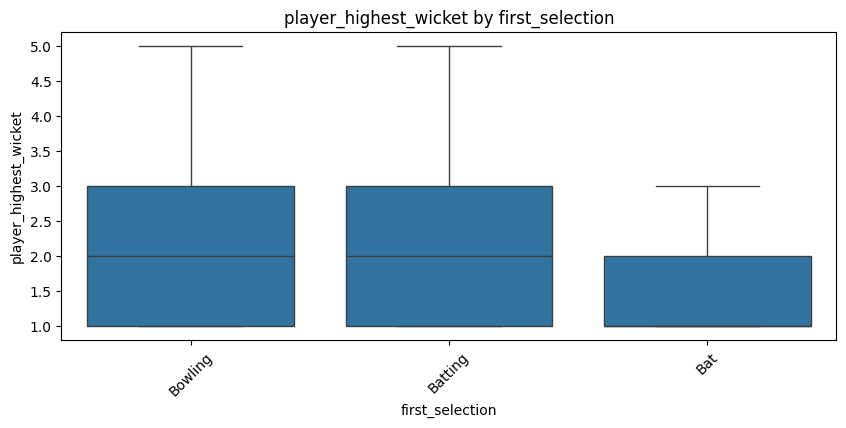

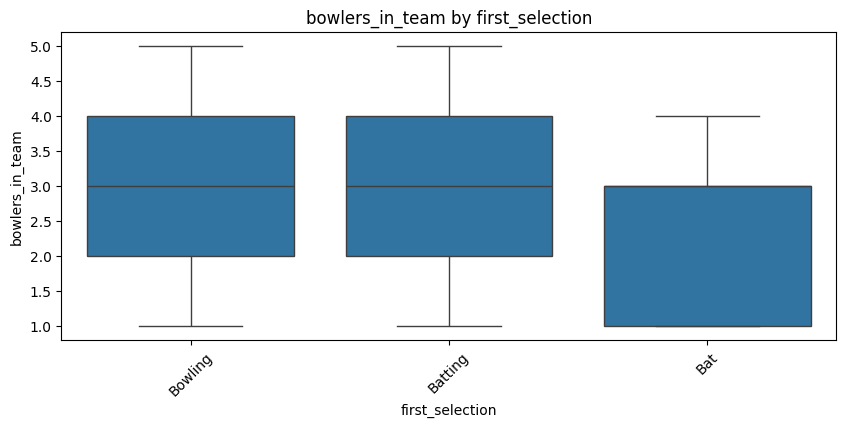

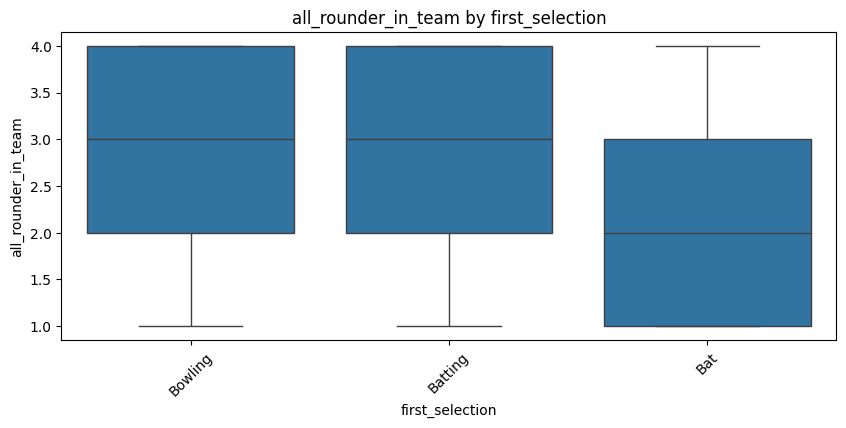

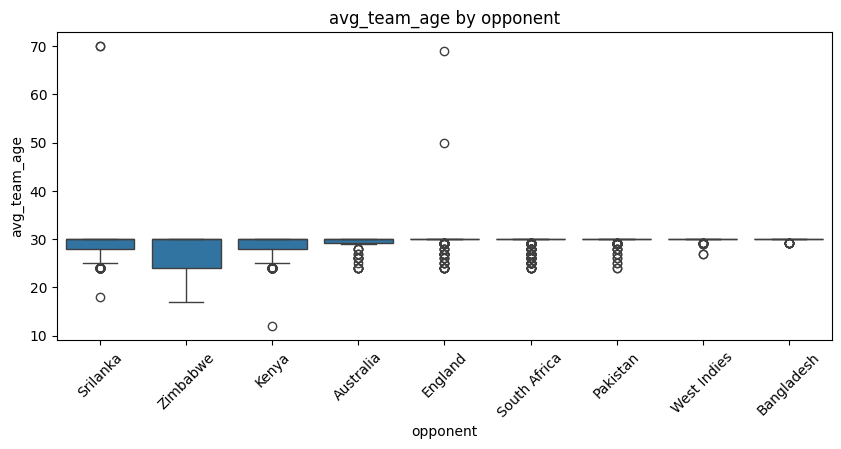

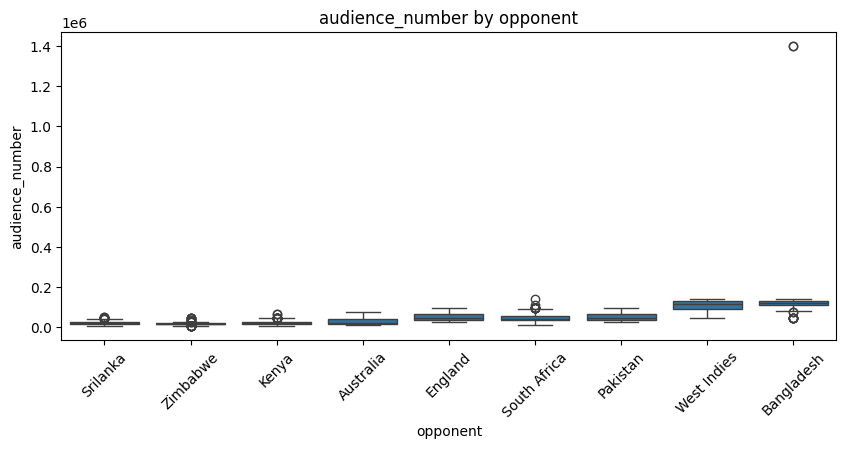

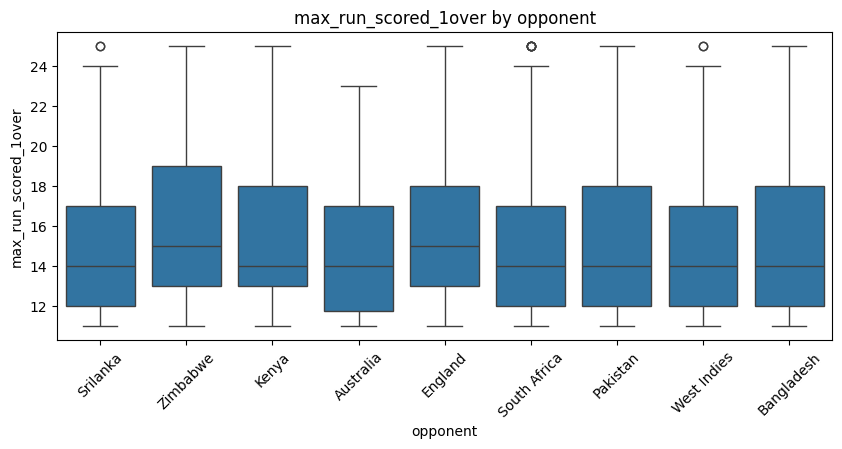

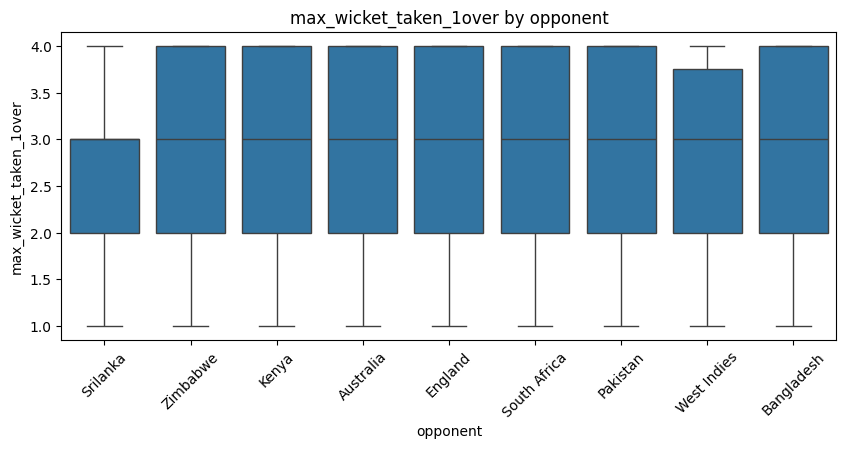

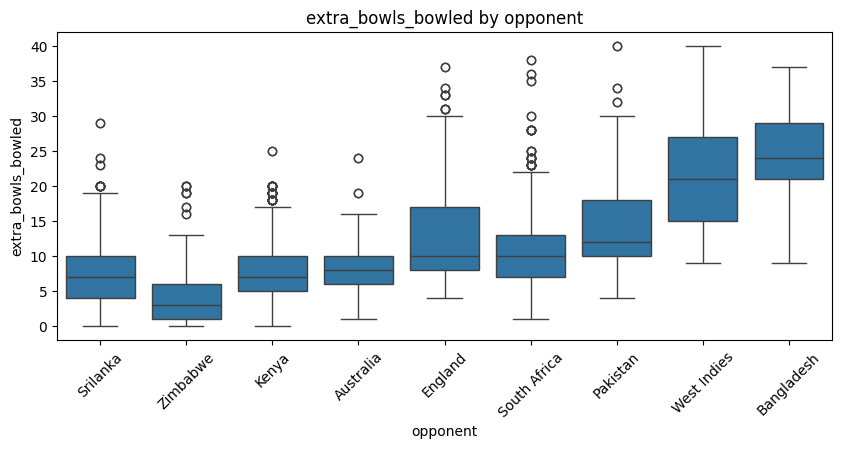

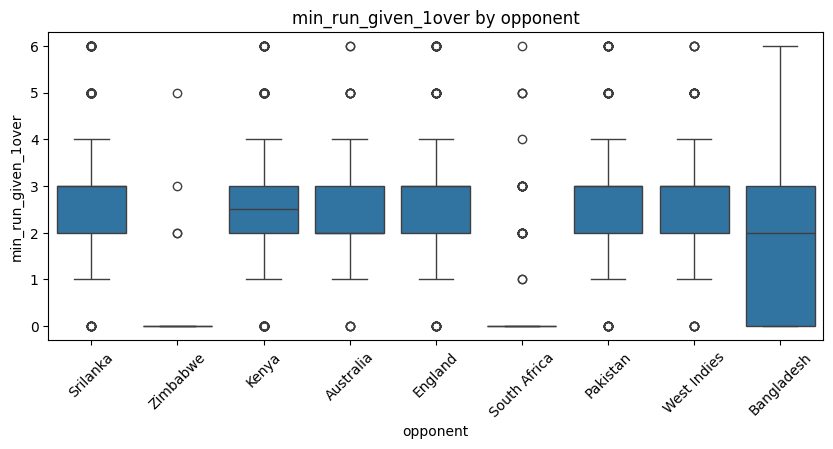

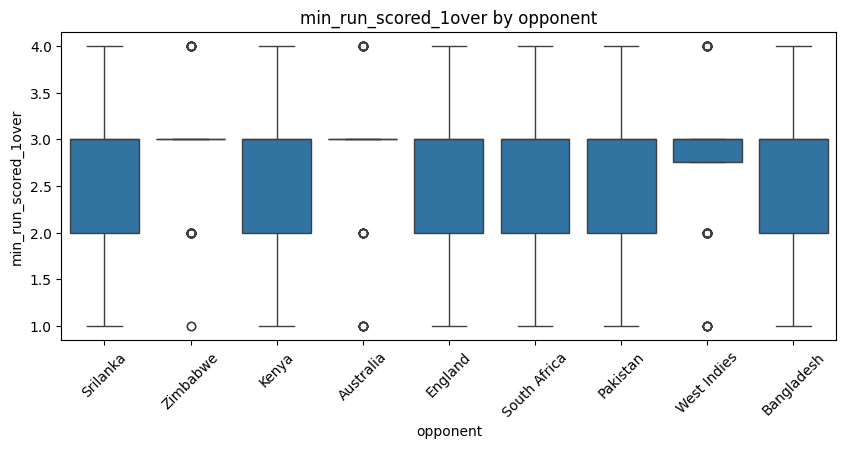

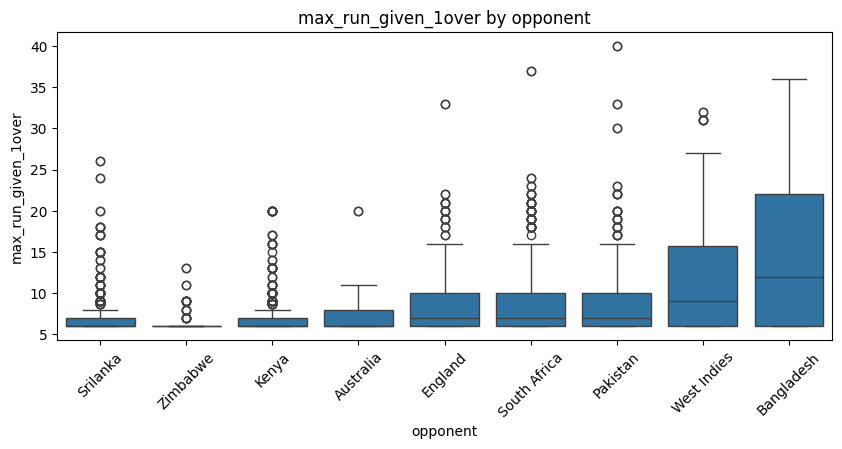

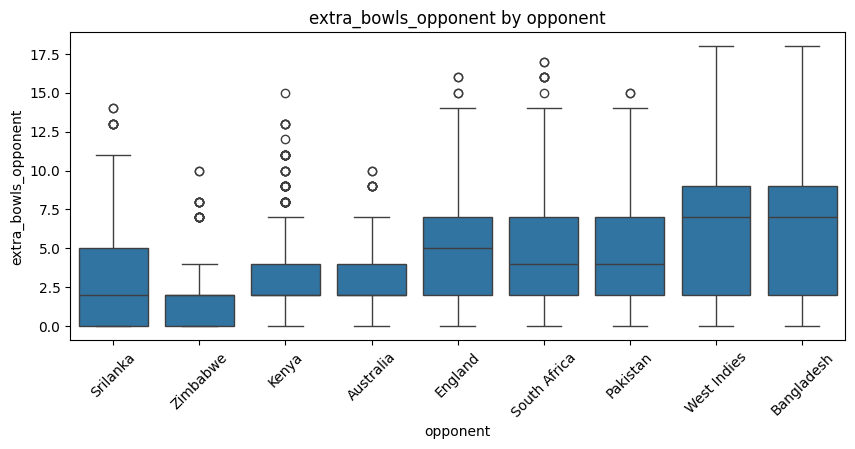

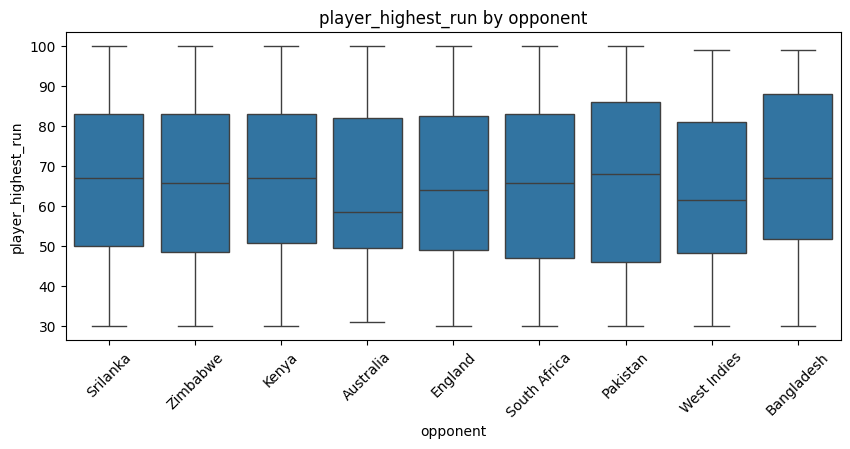

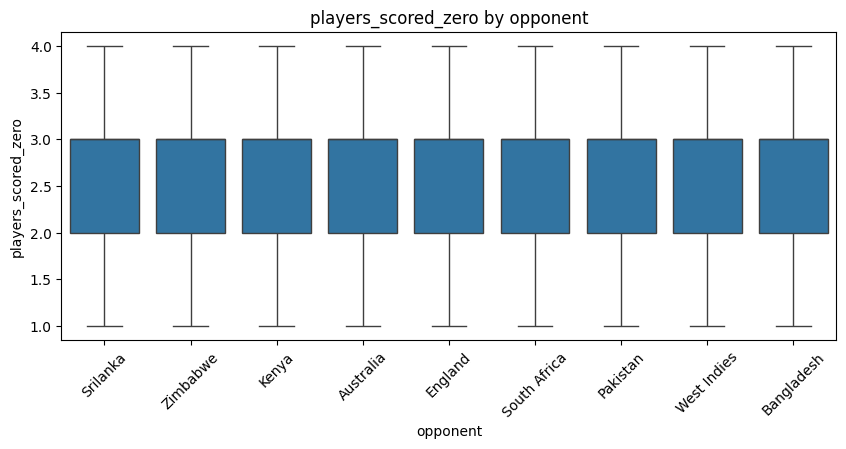

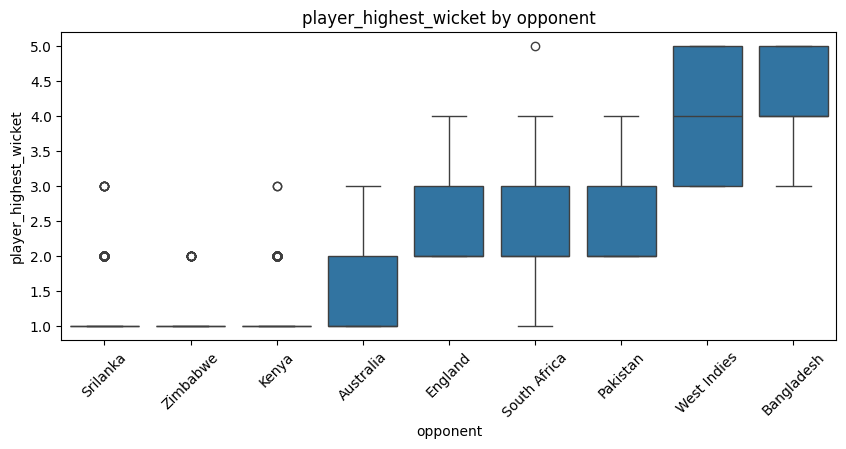

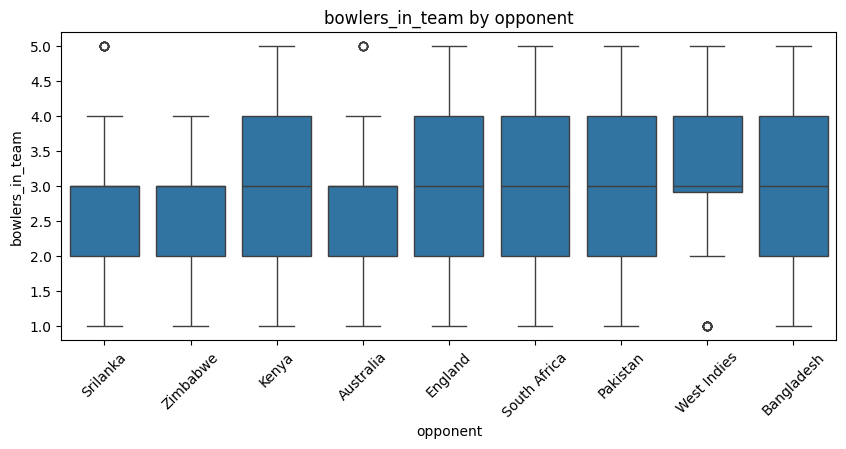

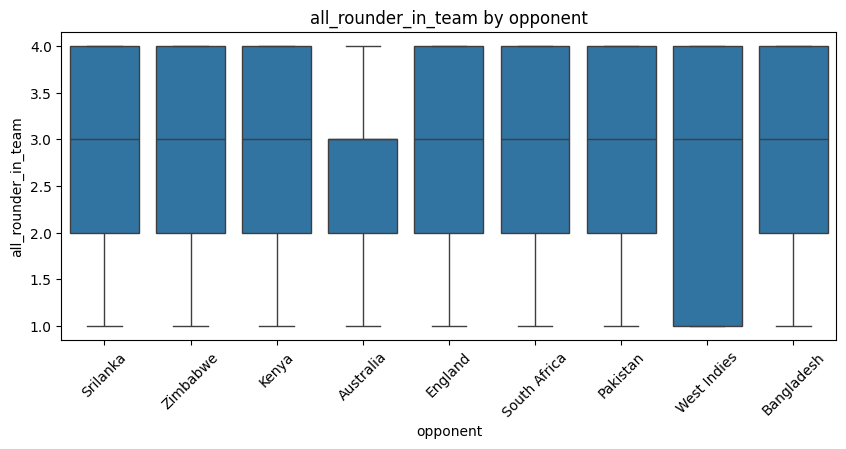

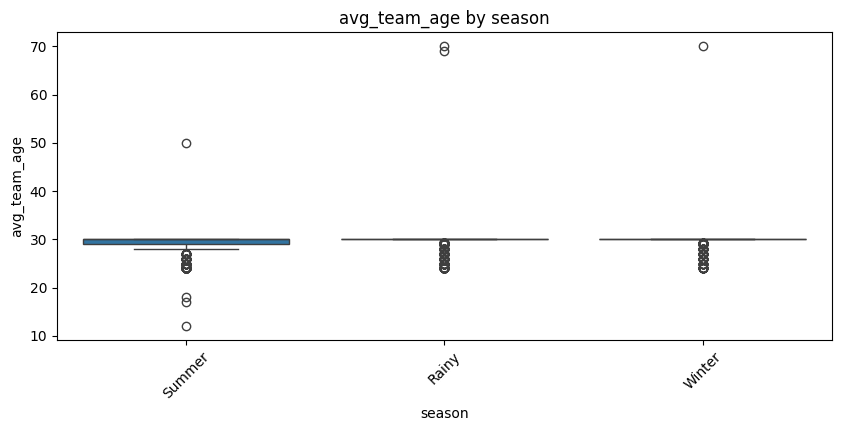

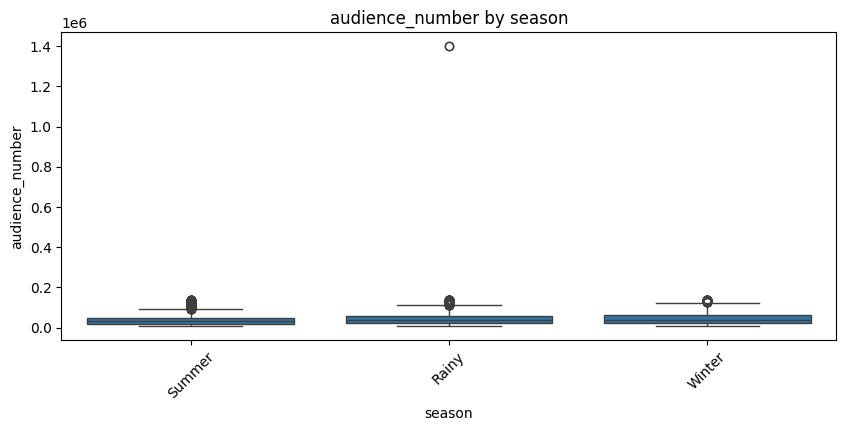

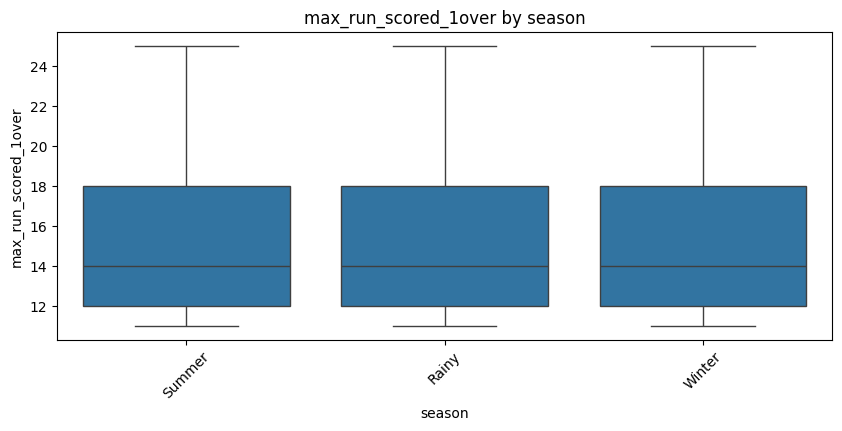

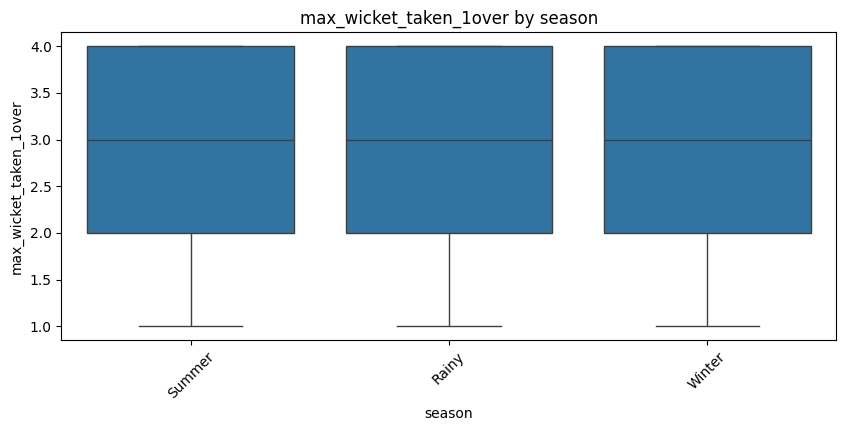

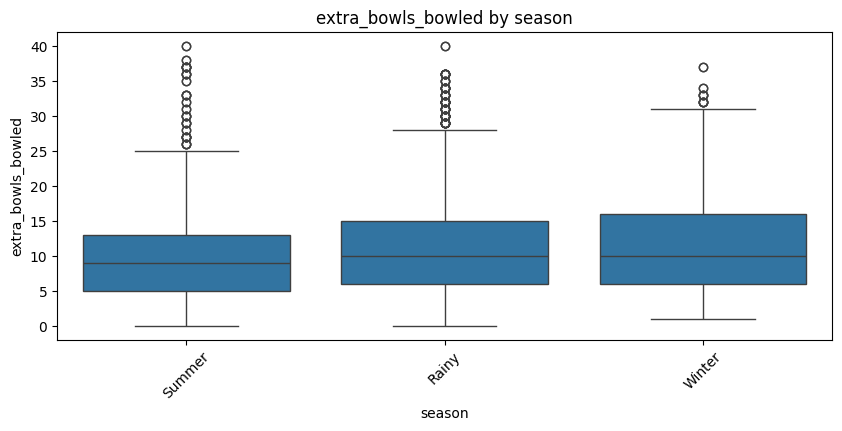

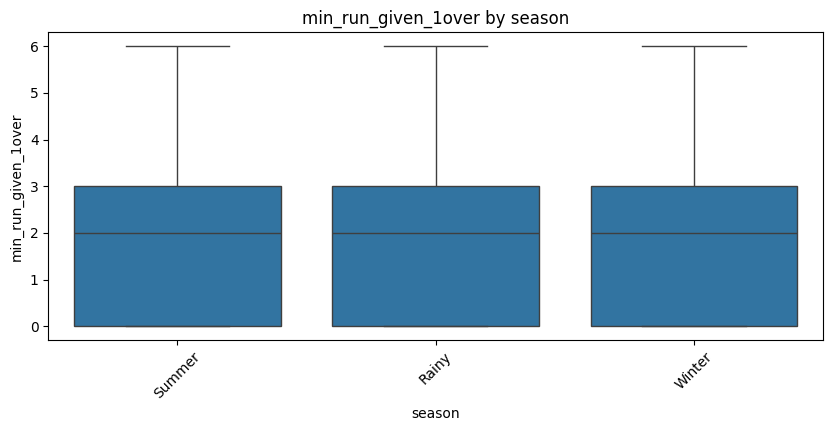

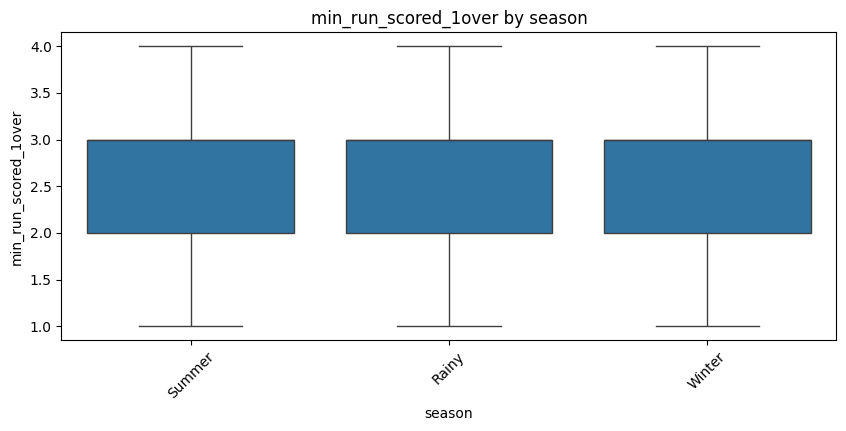

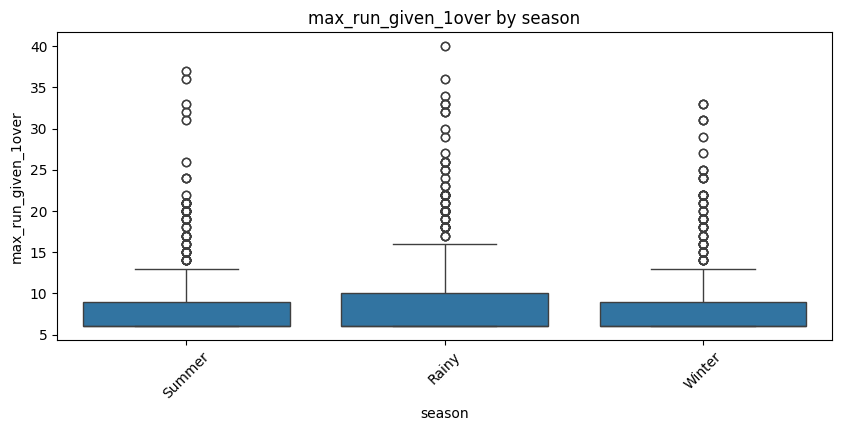

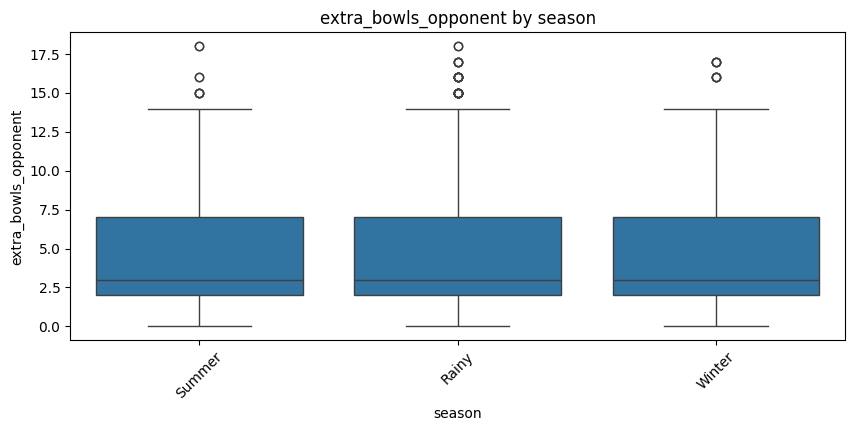

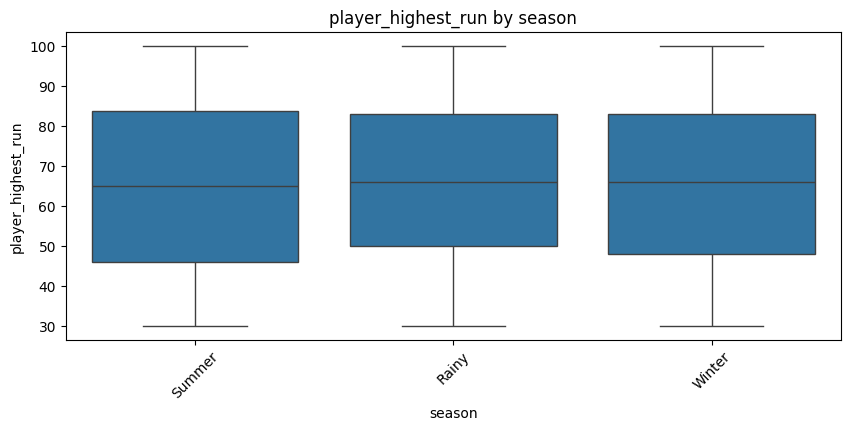

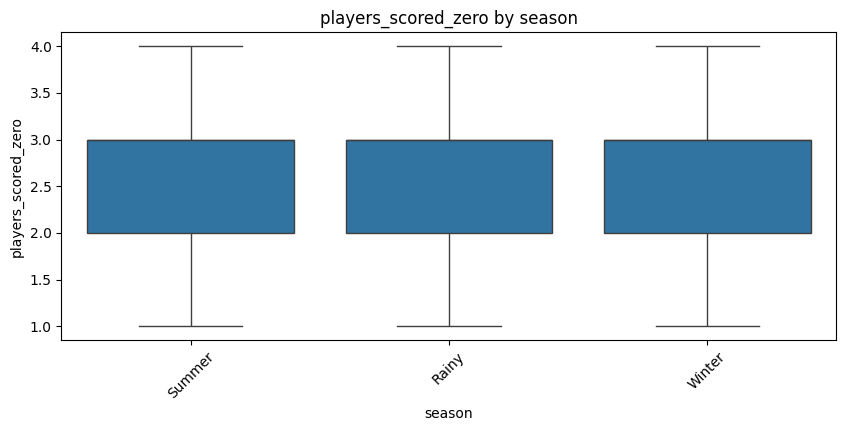

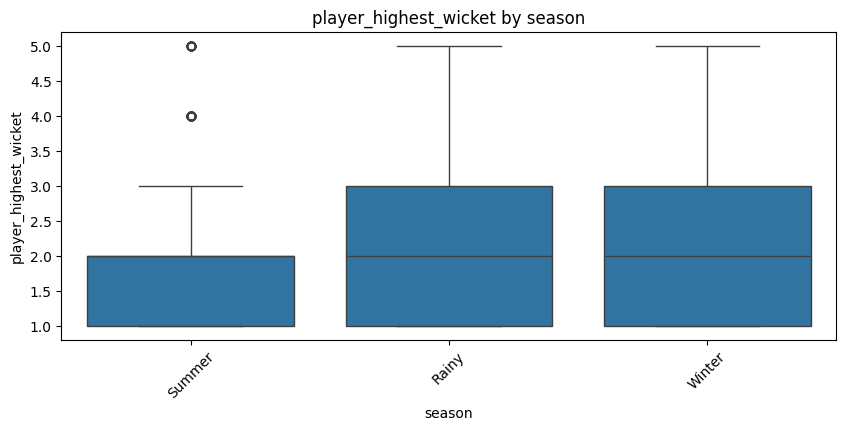

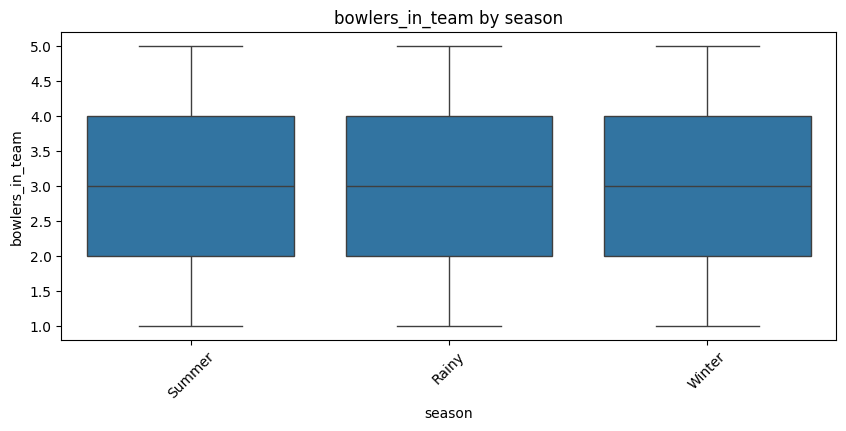

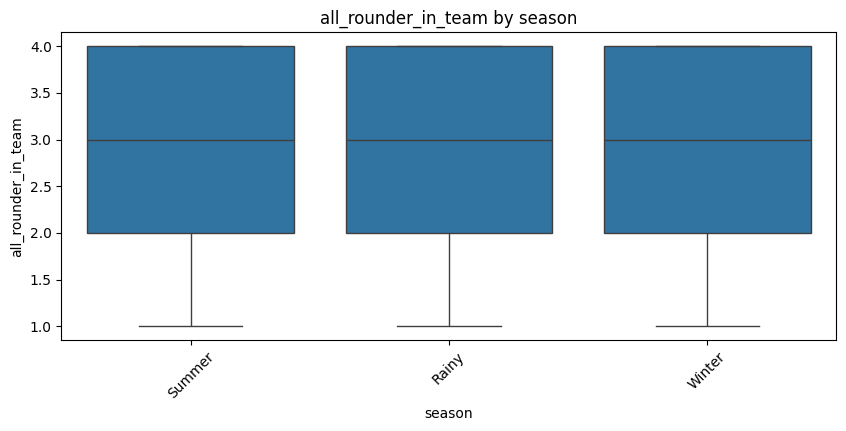

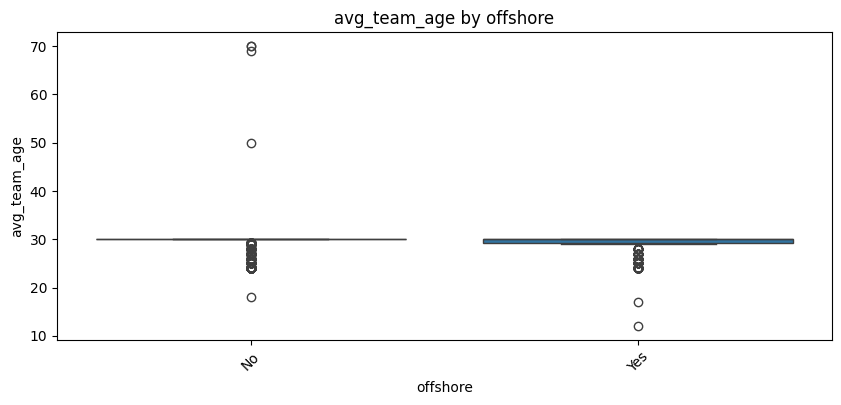

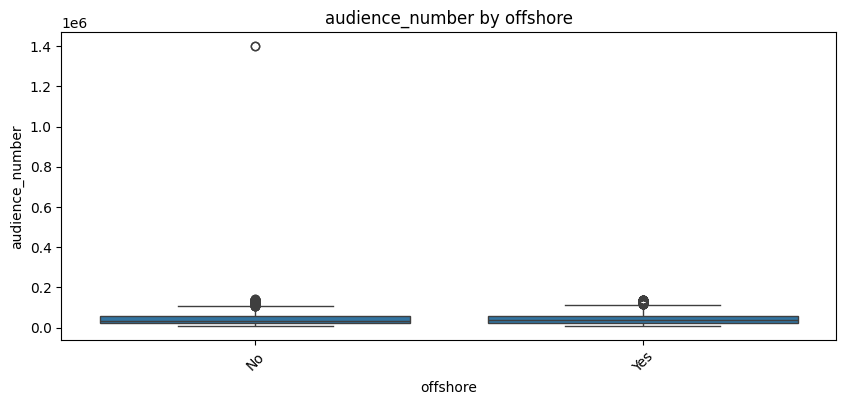

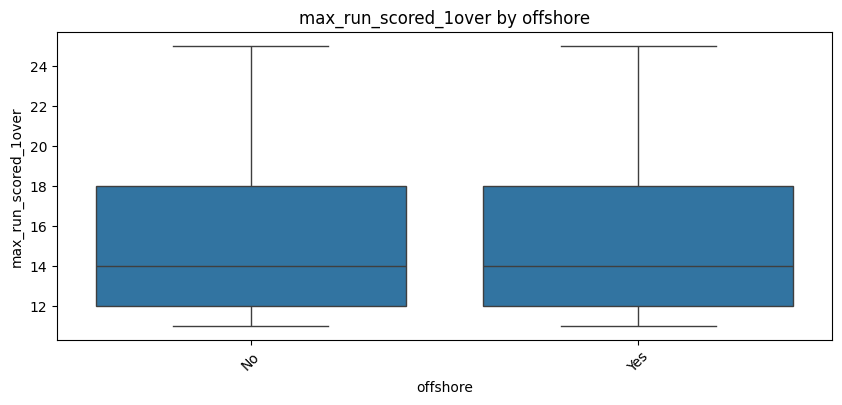

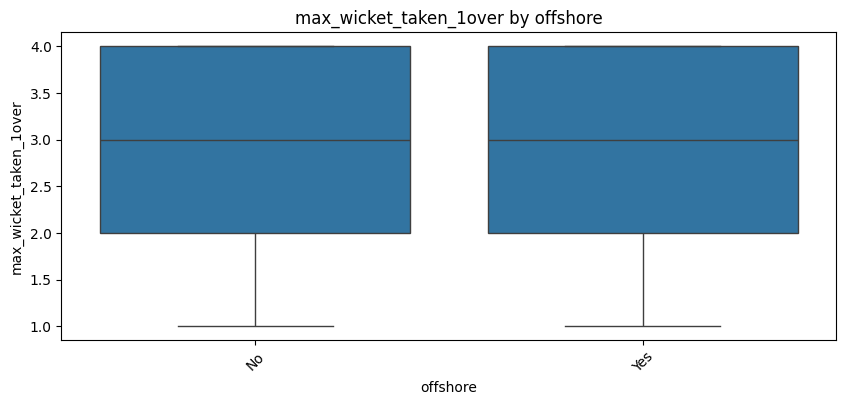

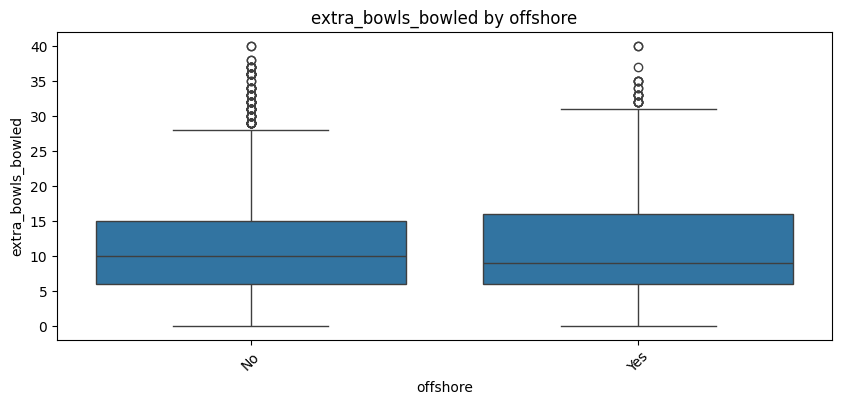

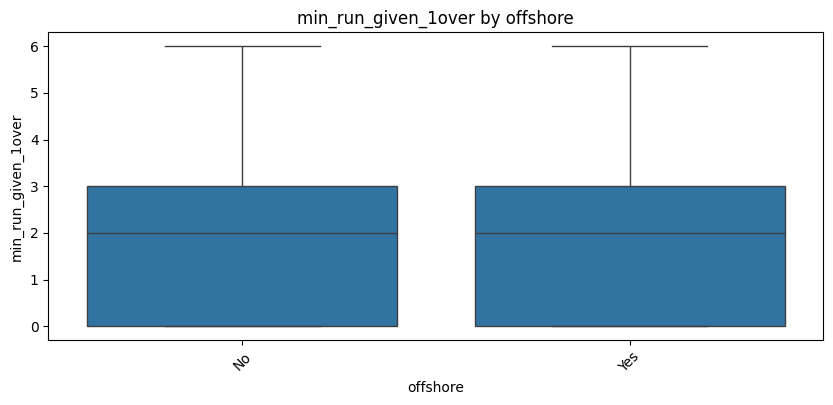

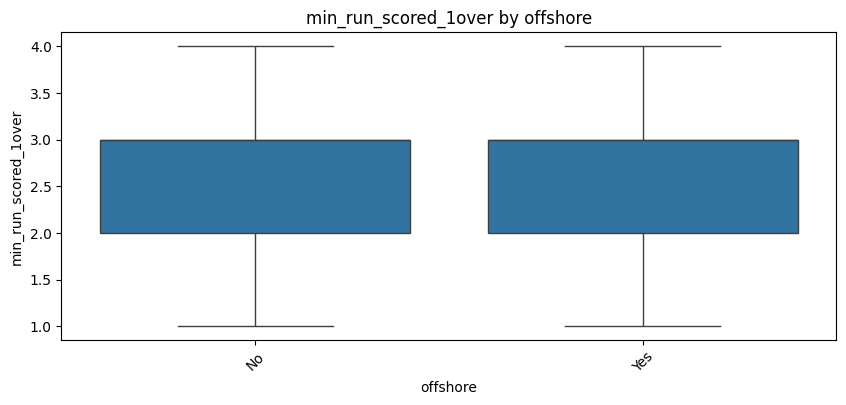

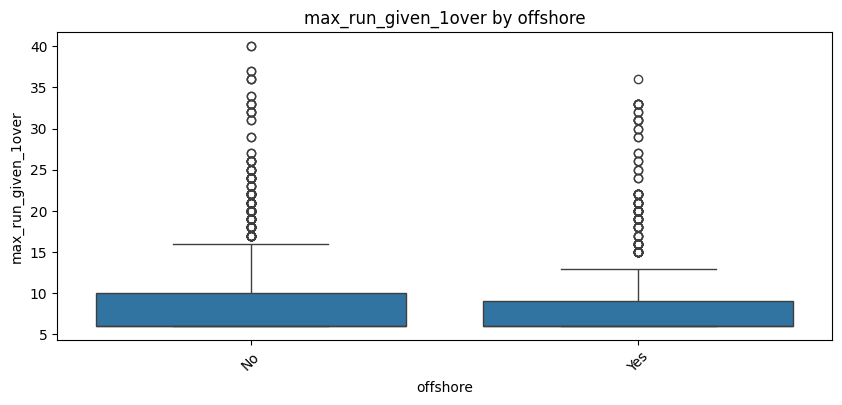

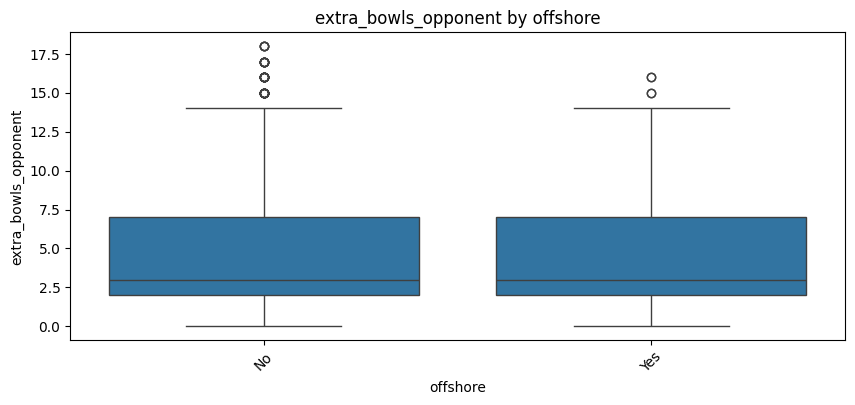

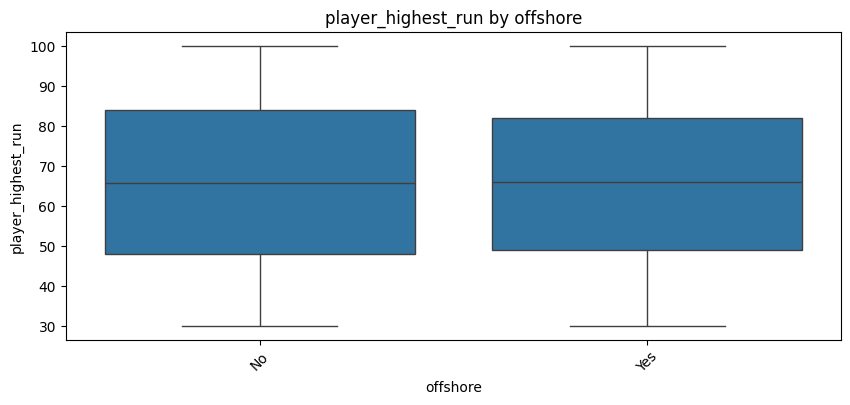

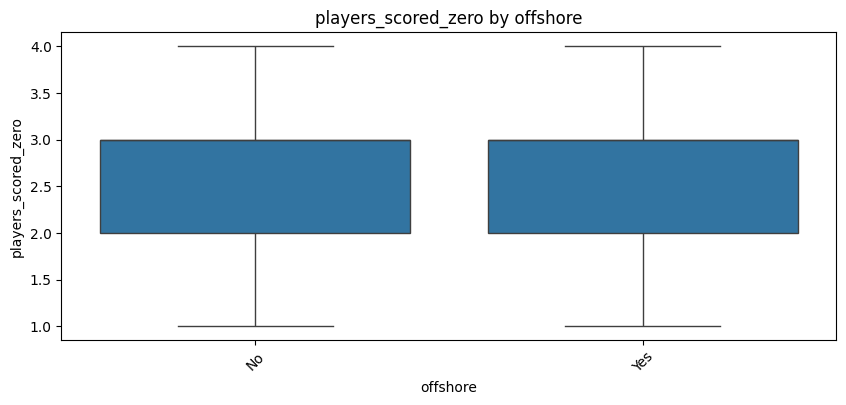

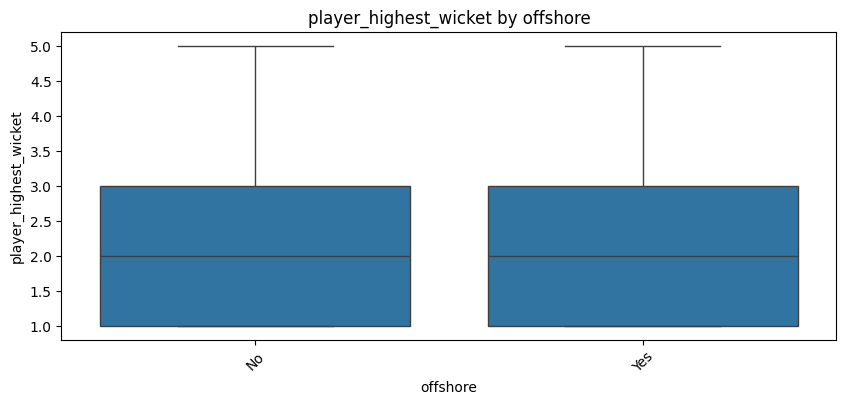

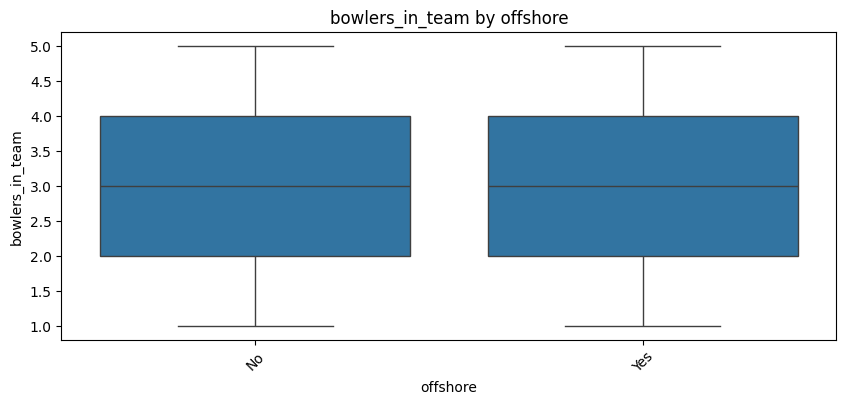

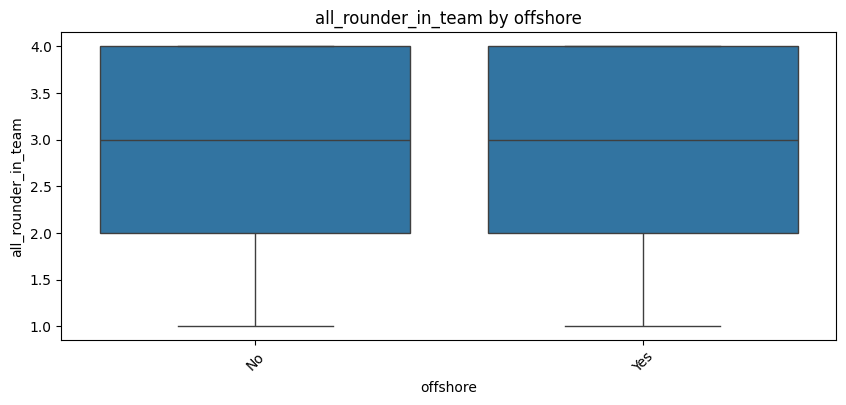

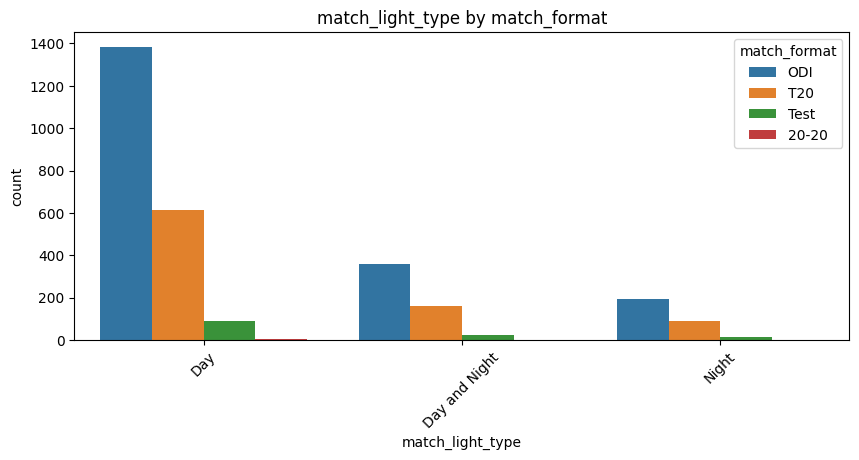

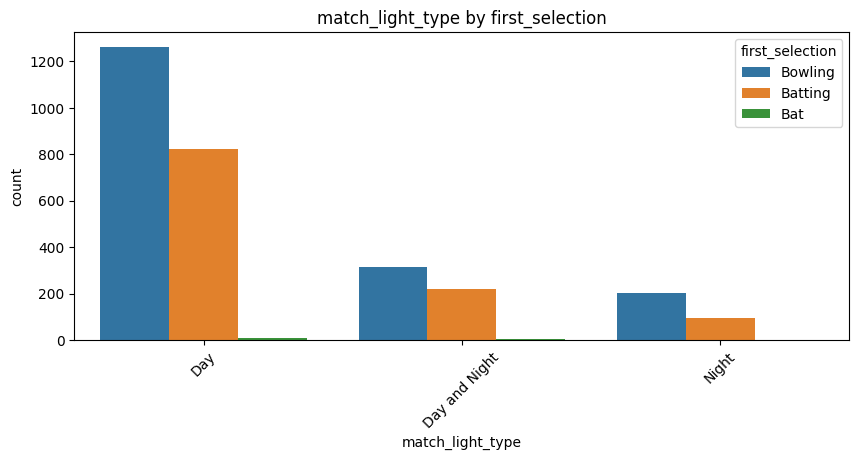

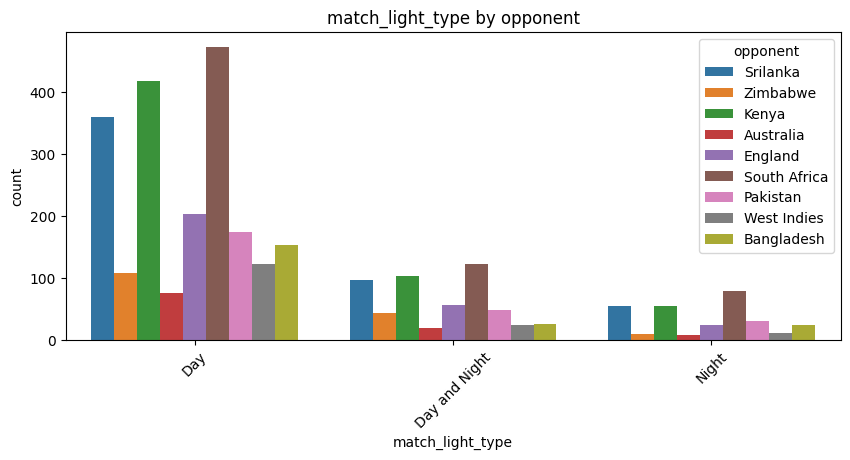

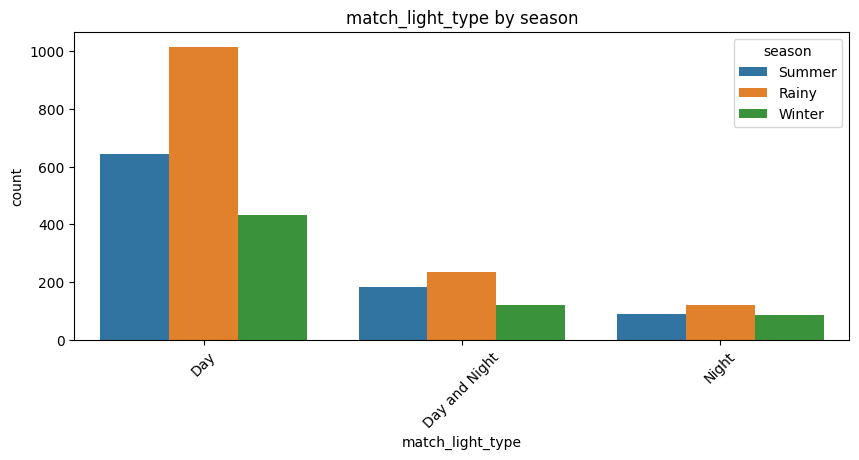

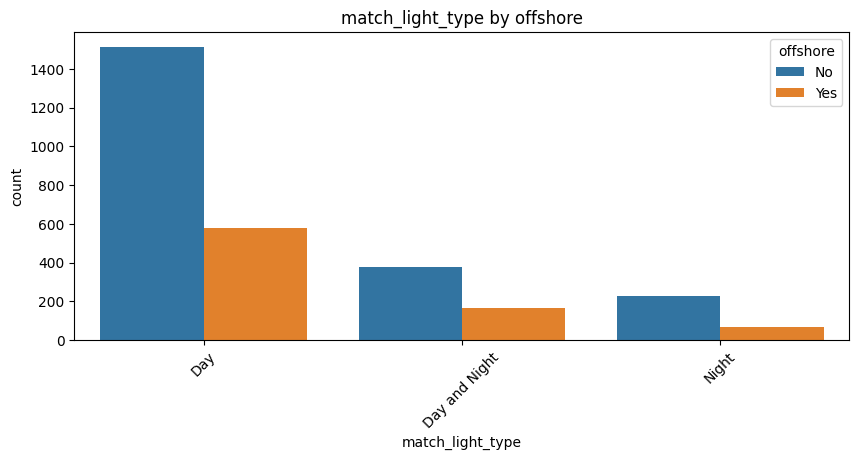

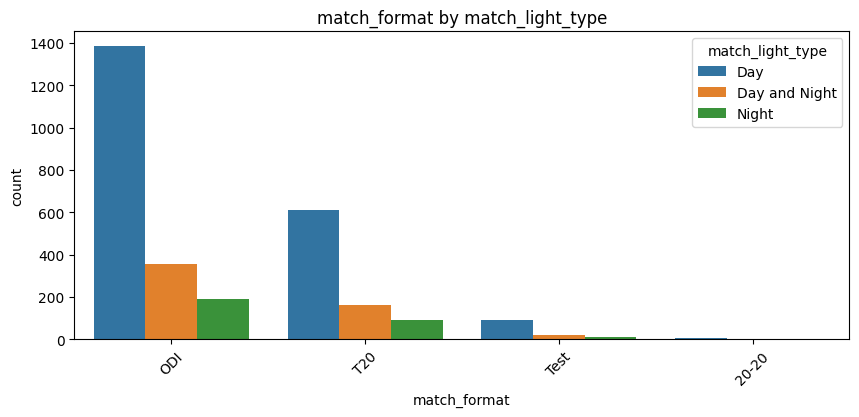

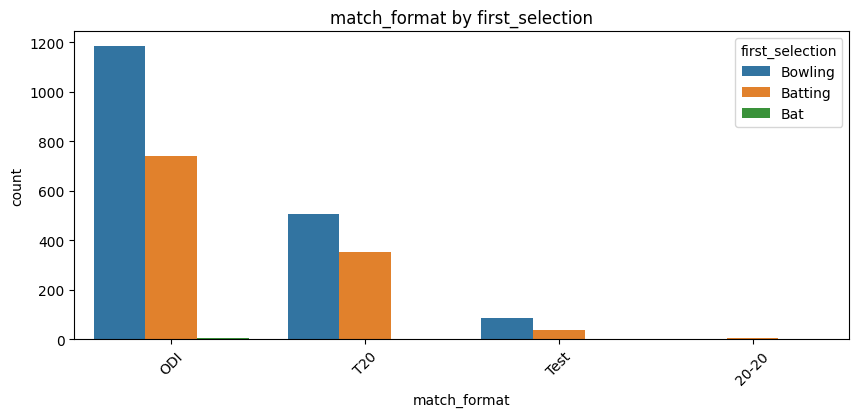

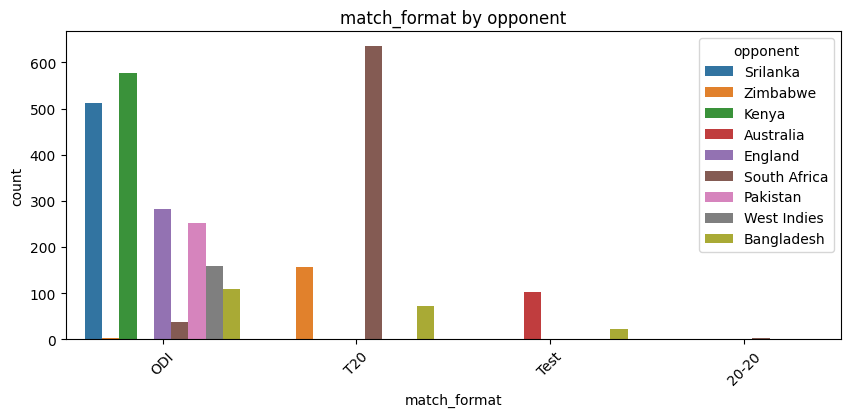

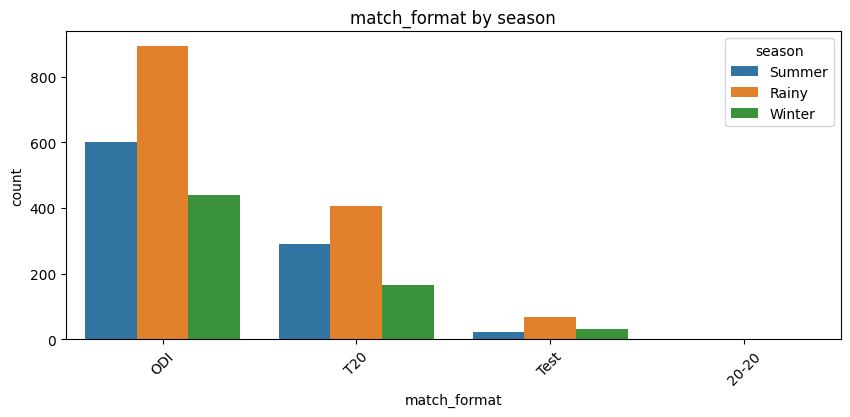

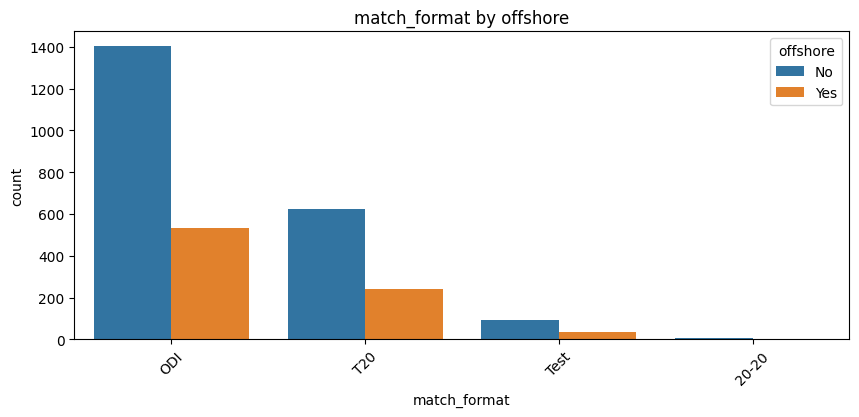

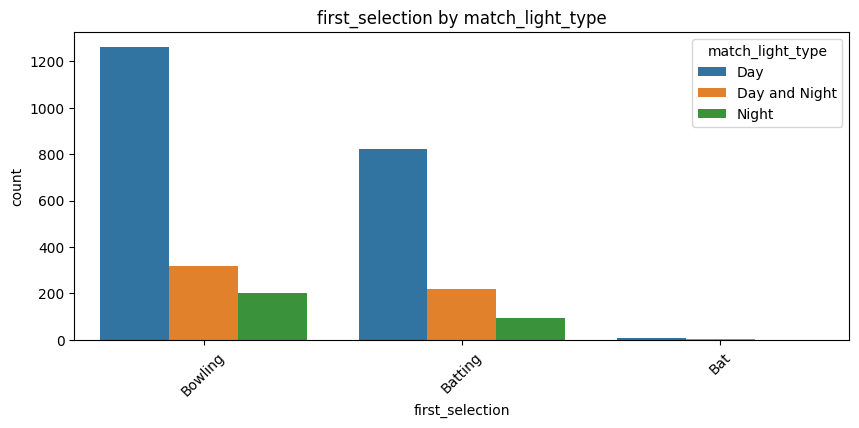

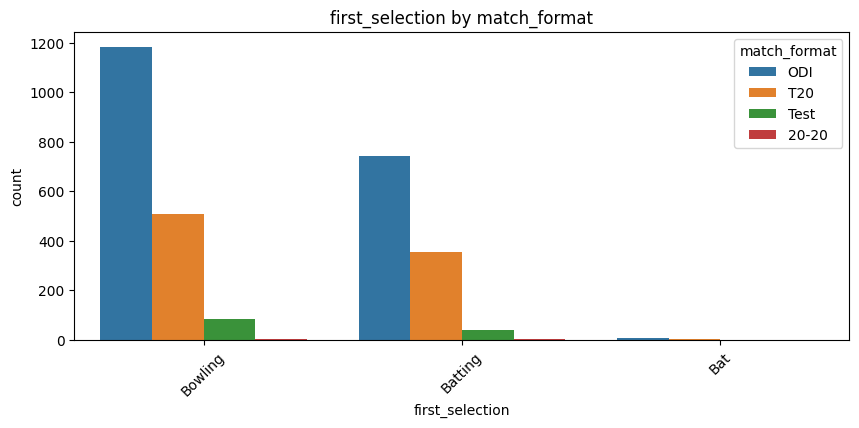

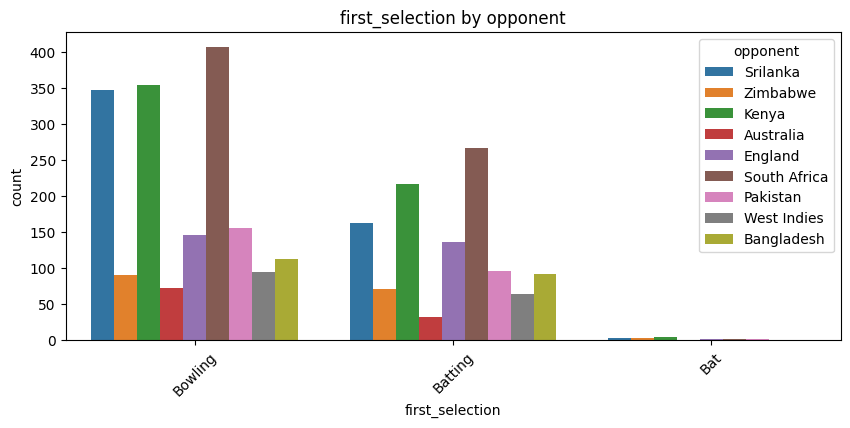

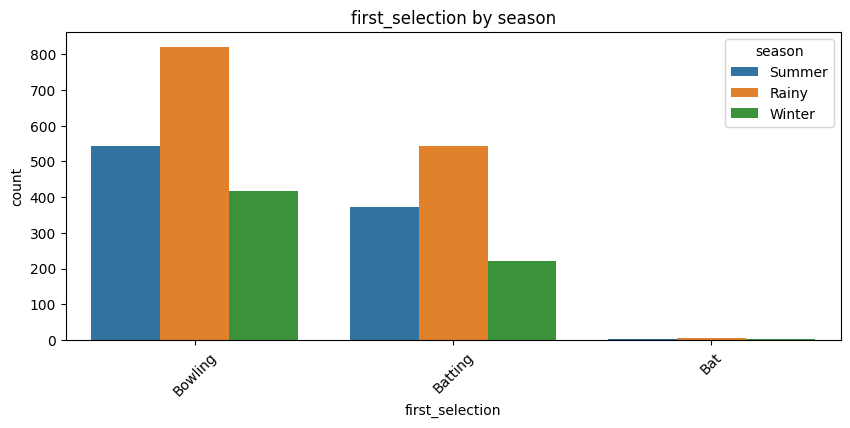

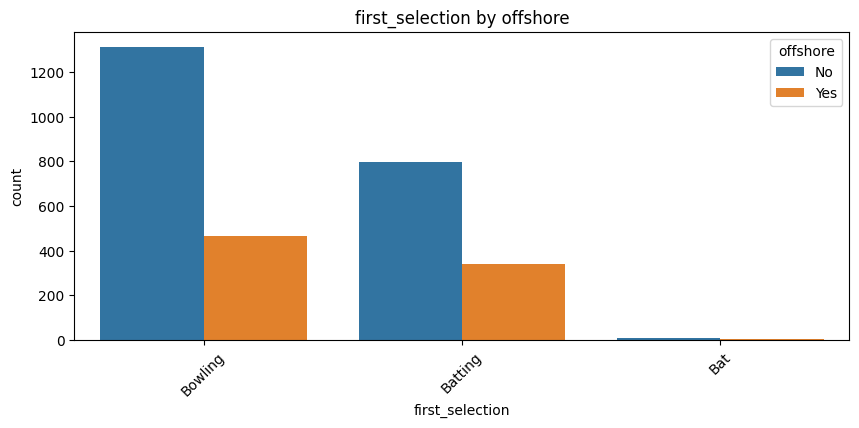

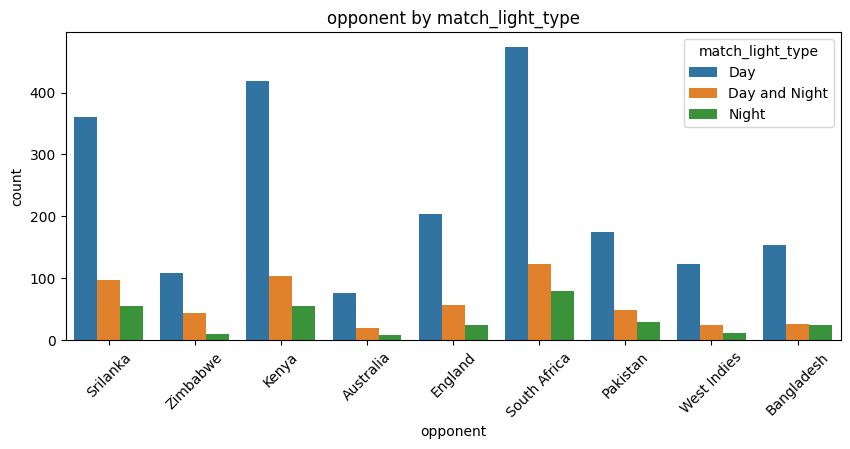

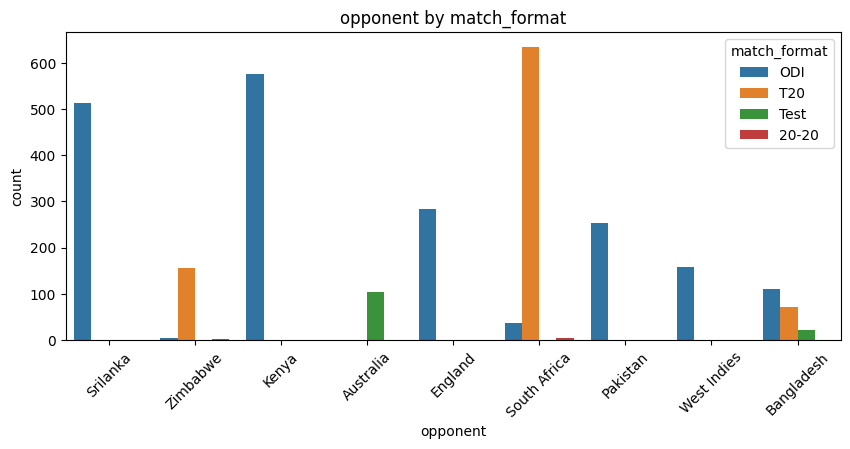

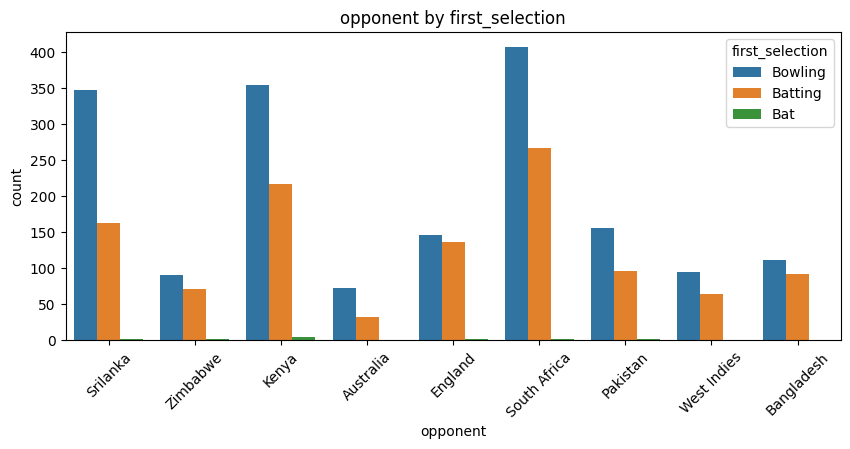

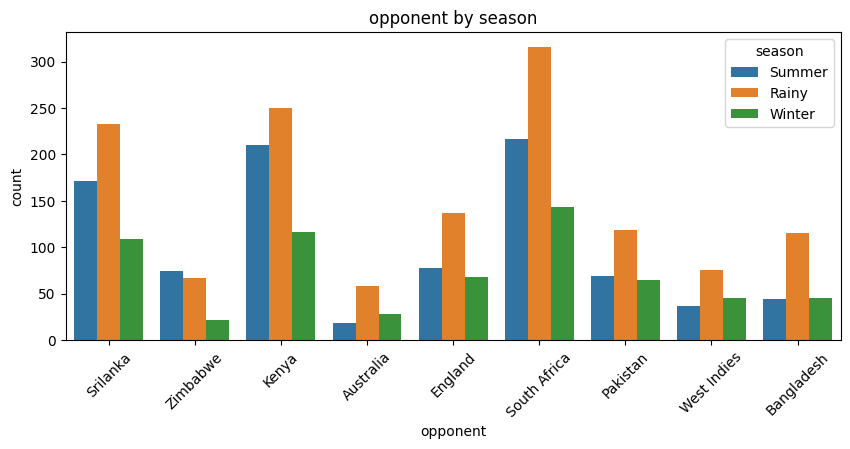

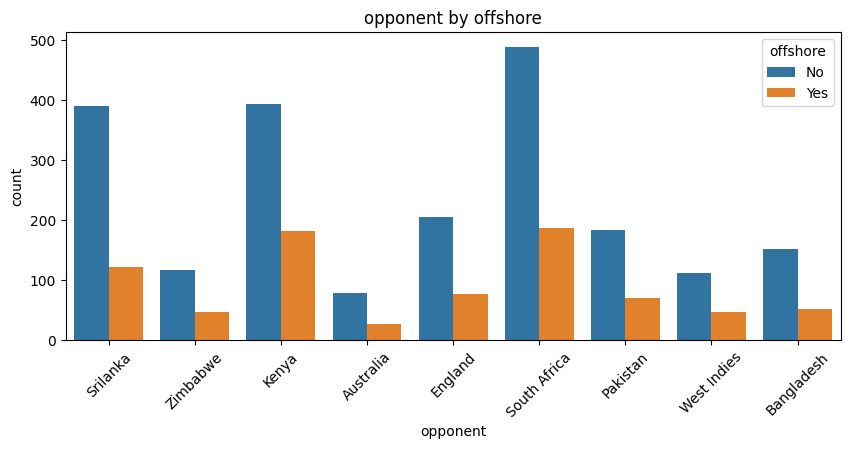

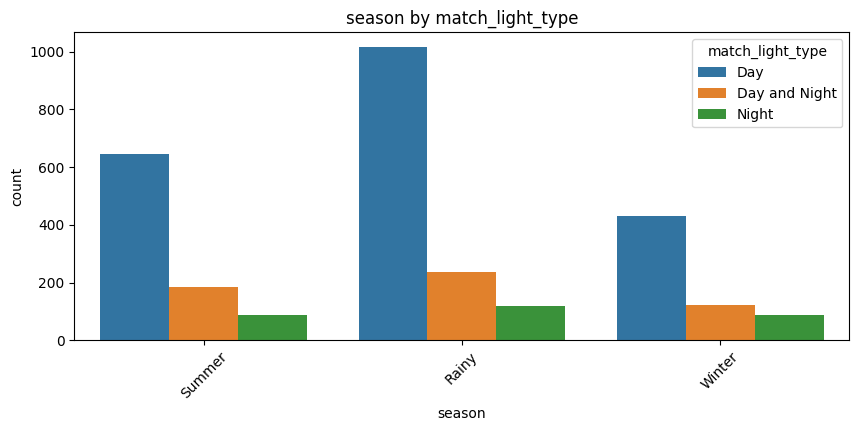

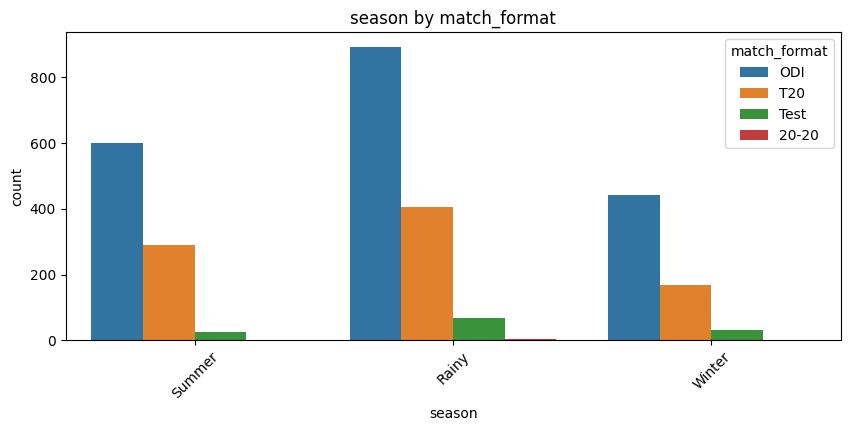

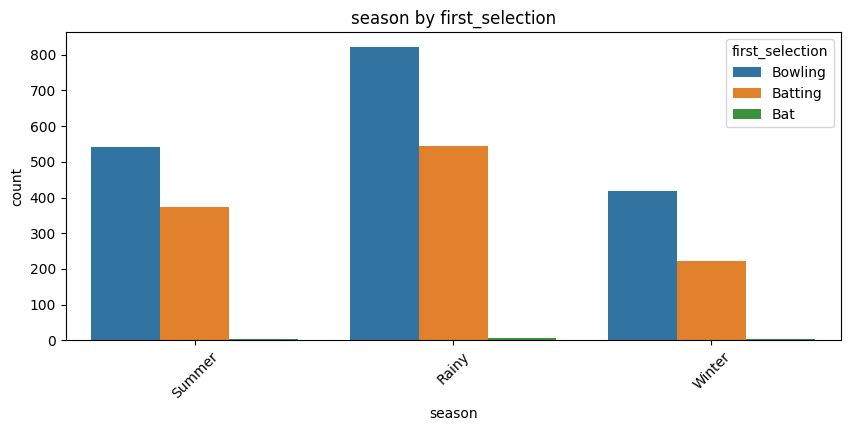

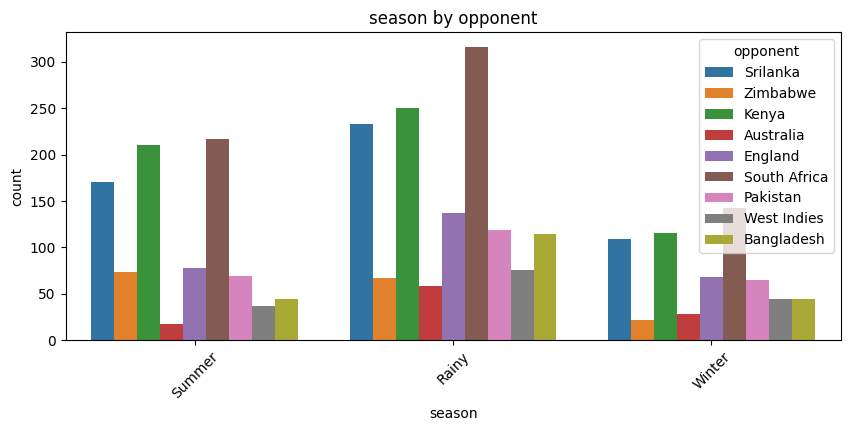

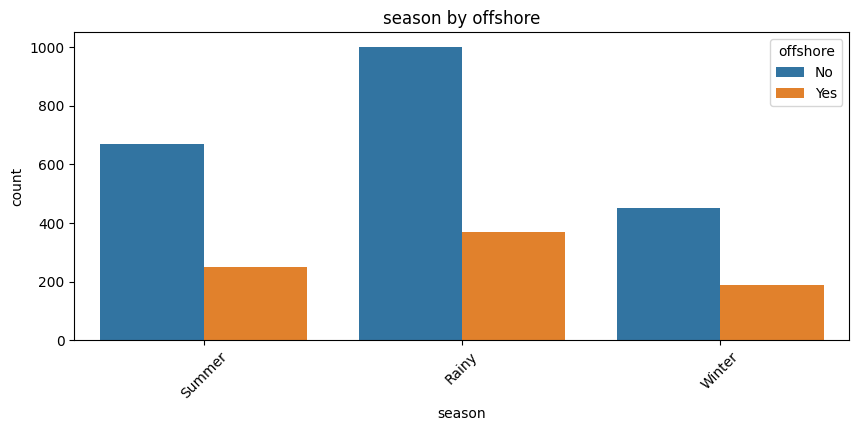

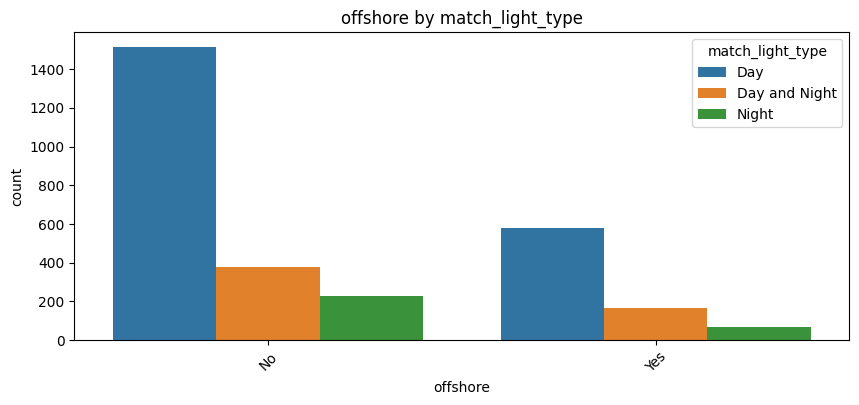

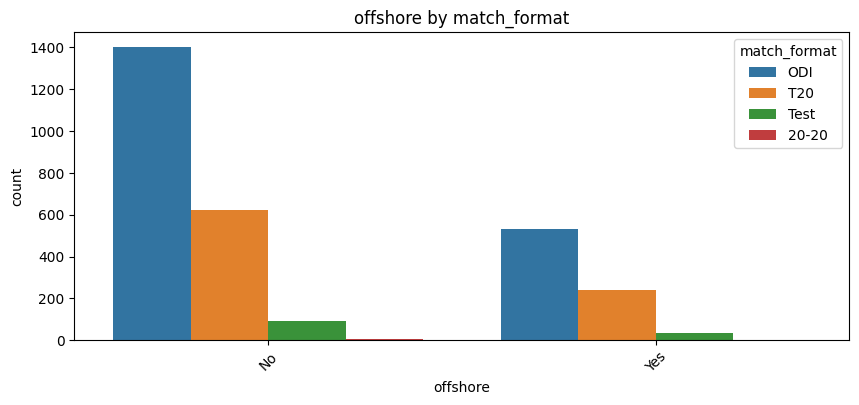

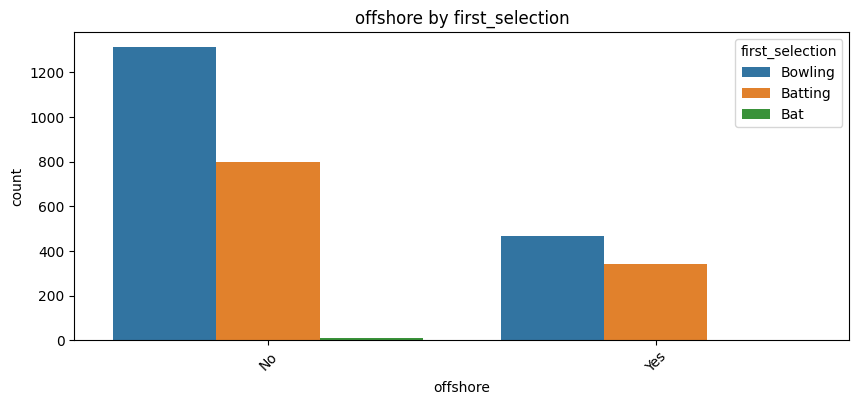

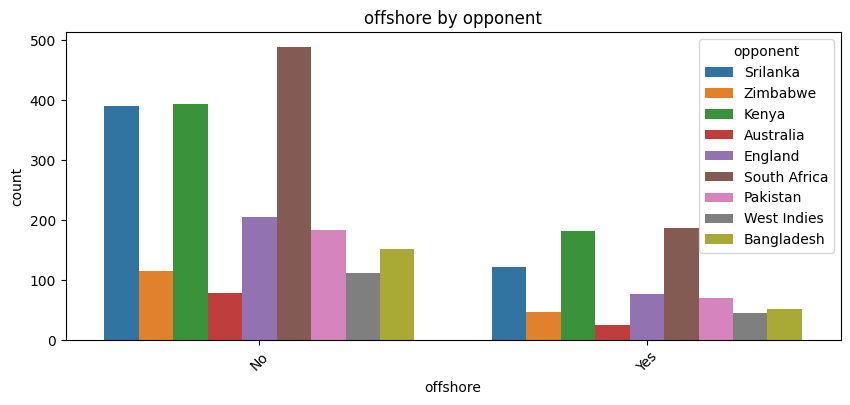

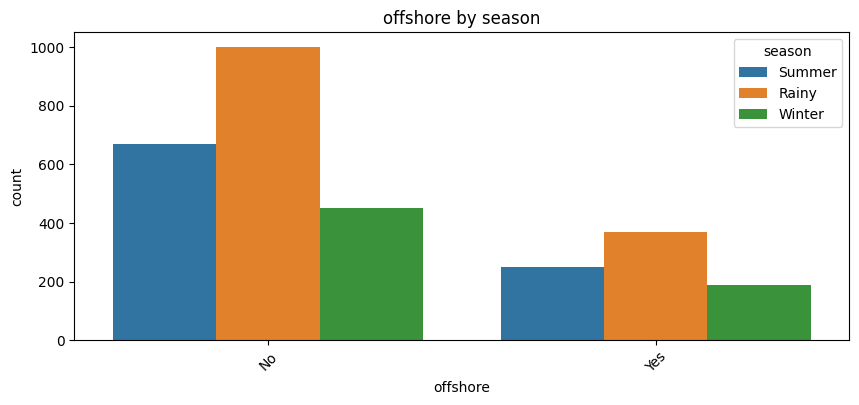

In [12]:
# Continuous-Continuous Relationships
sns.pairplot(data[continuous_vars])
plt.show()

# Continuous-Categorical Relationships
for var in categorical_vars:
    for cont_var in continuous_vars:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=data[var], y=data[cont_var])
        plt.title(f'{cont_var} by {var}')
        plt.xticks(rotation=45)
        plt.show()

# Categorical-Categorical Relationships
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            plt.figure(figsize=(10, 4))
            sns.countplot(x=data[var1], hue=data[var2])
            plt.title(f'{var1} by {var2}')
            plt.xticks(rotation=45)
            plt.show()


In [13]:
# Example: Removing outliers using IQR method
for var in continuous_vars:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[var] < (Q1 - 1.5 * IQR)) | (data[var] > (Q3 + 1.5 * IQR)))
    data = data[~outliers]


In [15]:
import numpy as np
# Example: Log transformation for skewed variables
for var in continuous_vars:
    if data[var].skew() > 1:
        data[var] = np.log1p(data[var])


result
Win     1516
Loss     255
Name: count, dtype: int64


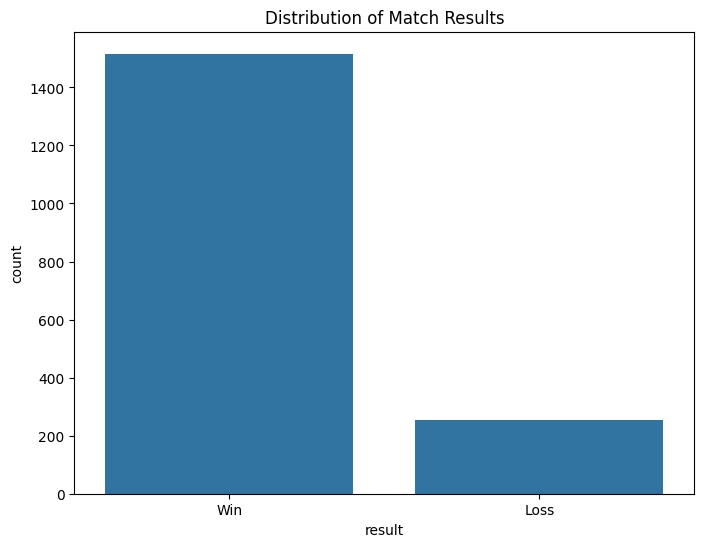

In [16]:
# Check the distribution of the target variable 'Result'
result_counts = data['result'].value_counts()
print(result_counts)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=data)
plt.title('Distribution of Match Results')
plt.show()


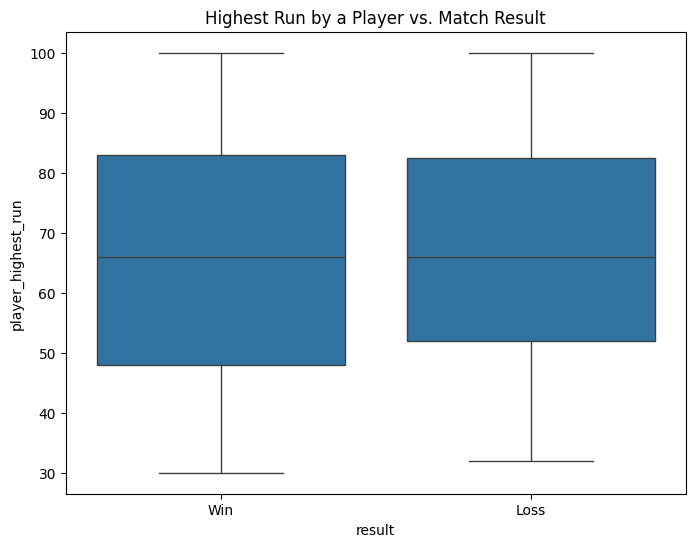

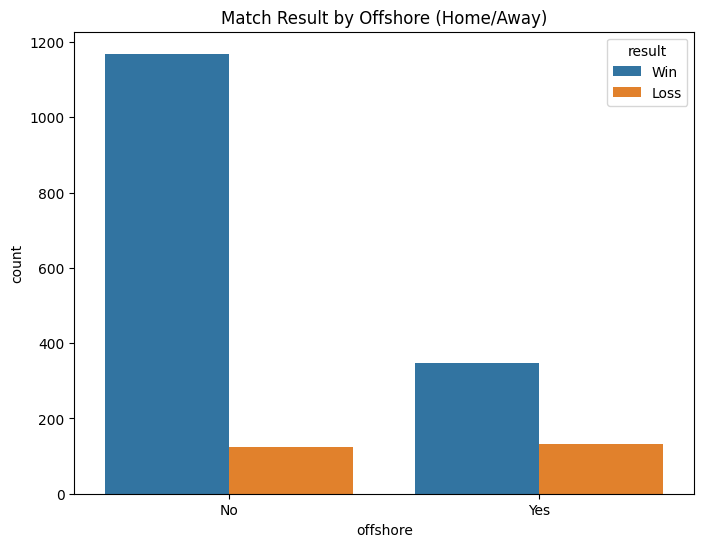

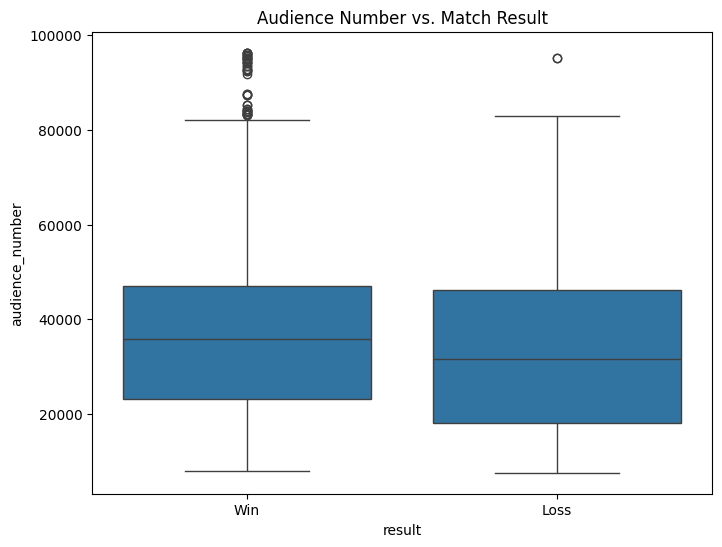

In [17]:
# Key Players Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='player_highest_run', data=data)
plt.title('Highest Run by a Player vs. Match Result')
plt.show()

# Home vs. Away Performance
plt.figure(figsize=(8, 6))
sns.countplot(x='offshore', hue='result', data=data)
plt.title('Match Result by Offshore (Home/Away)')
plt.show()

# Audience Influence
plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='audience_number', data=data)
plt.title('Audience Number vs. Match Result')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   avg_team_age  audience_number  max_run_scored_1over  \
0           0.0         0.370706             -0.051127   
1           0.0         0.529812              0.024829   
2           0.0        -0.913728              0.030984   

   max_wicket_taken_1over  extra_bowls_bowled  min_run_given_1over  \
0                0.038829            0.262907            -0.266230   
1               -0.016677            0.522797            -0.051484   
2               -0.025647           -0.790769             0.336828   

   min_run_scored_1over  max_run_given_1over  extra_bowls_opponent  \
0              0.016361            -0.532862             -0.583379   
1              0.064542             1.193669              1.210988   
2             -0.080281            -0.584609             -0.546992   

   player_highest_run  players_scored_zero  player_highest_wicket  
0            0.009304            -0.060110               0.482393  
1           -0.094059             0.046614               0.613285  
2

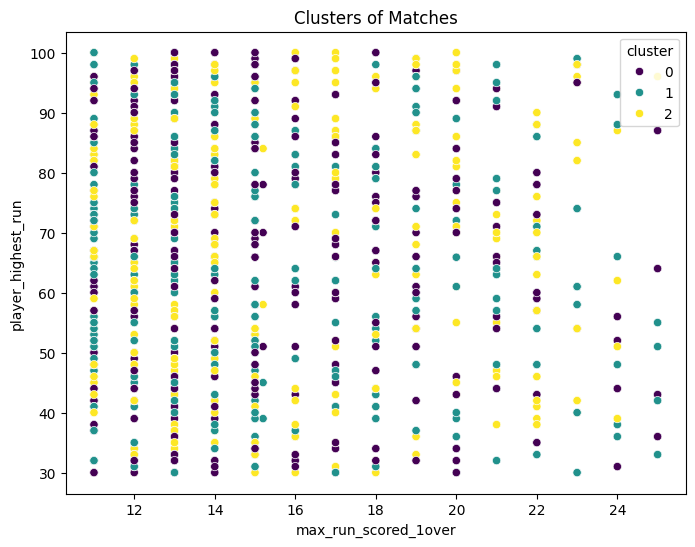

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['avg_team_age', 'audience_number', 'max_run_scored_1over',
            'max_wicket_taken_1over', 'extra_bowls_bowled', 'min_run_given_1over',
            'min_run_scored_1over', 'max_run_given_1over', 'extra_bowls_opponent',
            'player_highest_run', 'players_scored_zero', 'player_highest_wicket']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Analyze cluster centers
print(pd.DataFrame(kmeans.cluster_centers_, columns=features))

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['max_run_scored_1over'], y=data['player_highest_run'], hue=data['cluster'], palette='viridis')
plt.title('Clusters of Matches')
plt.show()
